In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12, 8]
mpl.rcParams['font.size'] = 13

# Analyze 0117 per time value estimation

In [3]:
df = pd.read_csv(
    '../policy_training_and_evaluation/estimation/0117_per_time_val_regression_summary.csv'
)
ktail_df = pd.read_csv('../policy_training_and_evaluation/estimation/0311_indepval_regression_summary.csv')

In [4]:
df.shape

(32, 14)

### Test loss & overall reward

In [5]:
df.mean_phy_real_info_gains[0] / df.mean_phy_info_gains[0]

28.6379891070926

In [6]:
ktail_df.mean_phy_real_info_gains[0] / ktail_df.mean_phy_info_gains[0]

-0.9893900757014493

In [7]:
df['sum_reward'] = df.mean_phy_real_info_gains[0] / df.mean_phy_info_gains[
    0] * df['mean_agent_info_gains'] - df['mean_agent_action_costs'] * 5e-4

In [9]:
df.head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,mean_phy_action_costs,mean_rand_info_gains,mean_rand_action_costs,mean_phy_real_info_gains,sum_reward
0,0.830598,../models/dqn_mimic-0117_dplabels_random_order...,0117_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.001,1,0.001426,35.680427,0.000166,11.219239,0.00016,43.812144,0.004748,0.022991
1,10.721524,../models/dqn_mimic-0117_dplabels_random_order...,0117_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.001,1,-0.000028,33.991296,0.000166,11.219239,0.00016,43.812144,0.004748,-0.017788
2,152557.814718,../models/dqn_mimic-0117_dplabels_random_order...,0117_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.001,1,0.008008,374.798965,0.000166,11.219239,0.00016,43.812144,0.004748,0.041938
3,0.144710,../models/dqn_mimic-0117_dplabels_random_order...,0117_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.001,1,0.000040,71.517090,0.000166,11.219239,0.00016,43.812144,0.004748,-0.034601
4,0.056898,../models/dqn_mimic-0117_dplabels_random_order...,0117_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.001,1,0.000989,103.195702,0.000166,11.219239,0.00016,43.812144,0.004748,-0.023288


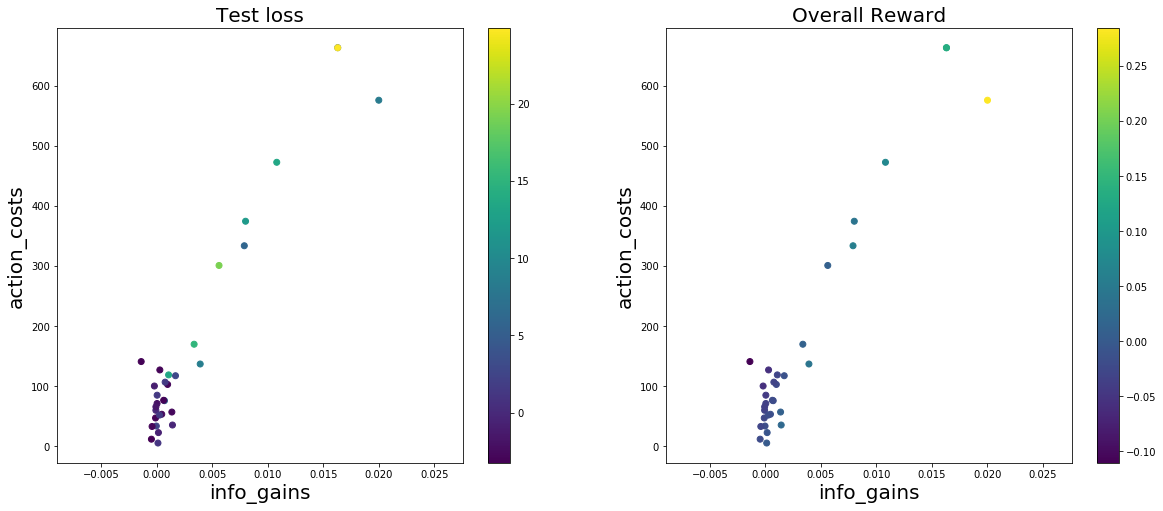

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))


def plot_by_color(the_ax, color, title):
    plot1 = the_ax.scatter(
        df['mean_agent_info_gains'], df['mean_agent_action_costs'], c=color)
    the_ax.set_xlabel('info_gains', fontsize=20)
    the_ax.set_ylabel('action_costs', fontsize=20)
    plt.colorbar(plot1, ax=the_ax)
    the_ax.set_title(title, fontsize=20)


plot_by_color(ax[0], np.log(df['test_loss']), title='Test loss')
plot_by_color(ax[1], df['sum_reward'], title='Overall Reward')

In [11]:
# Select the point arouod action_costs 588.451 that has low test_loss (convergence) and high overall sum_reward
df.iloc[18, :].policy_dir

'../models/dqn_mimic-0117_dplabels_random_order_search-g1-ac1.0e-03-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-2-1-512-lr-0.001-reg-0.0001-0.7-s-256-5000-i-50-500-3-1'

## Test loss < 10 (convergent), and find sum_reward biggest

In [25]:
df[df.test_loss < 10].sort_values(['sum_reward'], ascending=False).head()


,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,mean_phy_action_costs,mean_rand_info_gains,mean_rand_action_costs,mean_phy_real_info_gains,sum_reward
0,0.830598,../models/dqn_mimic-0117_dplabels_random_order...,0117_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.001,1,0.001426,35.680427,0.000166,11.219239,0.00016,43.812144,0.004748,0.022991
11,0.072485,../models/dqn_mimic-0117_dplabels_random_order...,0117_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.001,1,0.001371,57.281624,0.000166,11.219239,0.00016,43.812144,0.004748,0.010631
26,3.074380,../models/dqn_mimic-0117_dplabels_random_order...,0117_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.001,1,0.000120,5.712266,0.000166,11.219239,0.00016,43.812144,0.004748,0.000581
7,0.542880,../models/dqn_mimic-0117_dplabels_random_order...,0117_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.001,1,0.000162,23.042354,0.000166,11.219239,0.00016,43.812144,0.004748,-0.006881
22,0.078078,../models/dqn_mimic-0117_dplabels_random_order...,0117_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.001,1,0.000460,53.605095,0.000166,11.219239,0.00016,43.812144,0.004748,-0.013625


In [8]:
ktail_df[ktail_df.test_loss < 10].head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,...,mean_rand_action_costs,mean_phy_real_info_gains,val_mean_agent_info_gains,val_mean_agent_action_costs,val_mean_phy_info_gains,val_mean_phy_action_costs,val_mean_rand_info_gains,val_mean_rand_action_costs,val_mean_phy_real_info_gains,val_loss
0,0.000046,../models/dqn_mimic-0311_indep_24hrs_rand_ac_a...,0311_indep,../models/0121_with_larger_training_-StateToPr...,useless,0.00,1,-0.039647,391.360036,-0.020711,...,43.812144,0.020491,-0.039371,391.407594,-0.020893,11.386641,-0.023042,43.780216,0.021644,0.000048
1,0.000047,../models/dqn_mimic-0311_indep_24hrs_rand_ac_a...,0311_indep,../models/0121_with_larger_training_-StateToPr...,useless,0.00,1,-0.035678,442.406997,-0.020711,...,43.812144,0.020491,-0.035467,442.460758,-0.020893,11.386641,-0.023042,43.780216,0.021644,0.000048
3,9.375495,../models/dqn_mimic-0311_indep_24hrs_rand_ac_a...,0311_indep,../models/0121_with_larger_training_-StateToPr...,useless,0.00,1,0.002329,191.167095,-0.020711,...,43.812144,0.020491,0.002027,191.917346,-0.020893,11.386641,-0.023042,43.780216,0.021644,8.791942
4,0.000047,../models/dqn_mimic-0311_indep_24hrs_rand_ac_a...,0311_indep,../models/0121_with_larger_training_-StateToPr...,useless,0.00,1,-0.037443,408.375690,-0.020711,...,43.812144,0.020491,-0.037193,408.425316,-0.020893,11.386641,-0.023042,43.780216,0.021644,0.000049
5,0.000047,../models/dqn_mimic-0311_indep_24hrs_rand_ac_a...,0311_indep,../models/0121_with_larger_training_-StateToPr...,useless,0.01,1,-0.023363,0.000000,-0.020711,...,43.812144,0.020491,-0.023673,0.000000,-0.020893,11.386641,-0.023042,43.780216,0.021644,0.000048


In [26]:
df[df.test_loss < 10].sort_values(['sum_reward'],
                                  ascending=False).policy_dir.values[:10]

array(['../models/dqn_mimic-0117_dplabels_random_order_search-g1-ac1.0e-03-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-1-1-128-lr-0.0001-reg-0.0001-0.7-s-256-5000-i-50-500-3-1',
       '../models/dqn_mimic-0117_dplabels_random_order_search-g1-ac1.0e-03-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-2-1-256-lr-1e-05-reg-0.0001-0.5-s-256-5000-i-50-500-3-1',
       '../models/dqn_mimic-0117_dplabels_random_order_search-g1-ac1.0e-03-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-4-1-256-lr-0.0001-reg-0.0-0.7-s-256-5000-i-50-500-3-1',
       '../models/dqn_mimic-0117_dplabels_random_order_search-g1-ac1.0e-03-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-2-1-128-lr-0.0001-reg-0.01-0.5-s-256-5000-i-50-500-3-1',
       '../models/dqn_mimic-0117_dplabels_random_order_search-g1-ac1.0e-03-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-3-1-512-lr-1e-05-reg-0.0001-0.7-s-256-5000-i-50-500-3-1',
       '../models/dqn_mimic-0117_dplabels_random_order_search-g1-ac1.0e-03-gamma0.95-fold1.0-only

### Overall reward is dominated by action cost

In [9]:
selected_ktail_df = ktail_df[(ktail_df['mean_agent_info_gains'] > ktail_df['mean_phy_info_gains']) &
                 (ktail_df['mean_agent_action_costs'] < ktail_df['mean_phy_action_costs'])]
selected_ktail_df

In [10]:
selected_df = df[(df['mean_agent_info_gains'] > df['mean_phy_info_gains']) &
                 (df['mean_agent_action_costs'] < df['mean_phy_action_costs'])]
selected_df

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,mean_phy_action_costs,mean_rand_info_gains,mean_rand_action_costs,mean_phy_real_info_gains


In [18]:
selected_df['policy_dir'].values

array([], dtype=object)

## Final plot

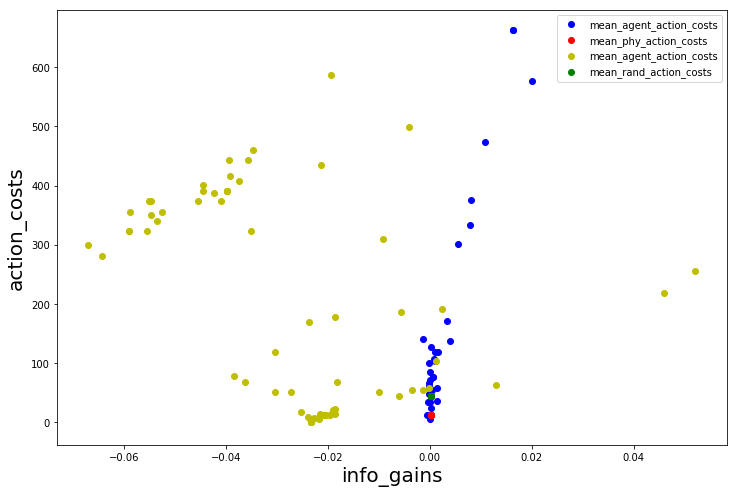

In [16]:
plt.figure(figsize=[12, 8])
plt.scatter(
    df['mean_agent_info_gains'],
    df['mean_agent_action_costs'],
    color='b',
)
plt.scatter(df['mean_phy_info_gains'], df['mean_phy_action_costs'], color='r')
plt.scatter(ktail_df['mean_agent_info_gains'], ktail_df['mean_agent_action_costs'], color='y')
plt.scatter(
    df['mean_rand_info_gains'], df['mean_rand_action_costs'], color='g')
plt.legend(loc='best')
plt.xlabel('info_gains', fontsize=20)
plt.ylabel('action_costs', fontsize=20)
plt.show()

# Analyze 0118 per time value estimation

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv(
    '../policy_training_and_evaluation/estimation/0118_new_est_val_regression_summary.csv'
)
df2 = pd.read_csv(
    '../policy_training_and_evaluation/estimation/0118_debugval_regression_summary.csv'
)
df = pd.concat([df, df2], axis=0).drop_duplicates().reset_index(drop=True)

In [42]:
df.head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,mean_phy_action_costs,mean_rand_info_gains,mean_rand_action_costs,mean_phy_real_info_gains
0,0.564317,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,0.001323,1.871141,0.002307,11.053778,-0.001327,42.693253,0.020491
1,1.249683,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,0.016475,32.316655,0.002307,11.053778,-0.001327,42.693253,0.020491
2,9.342138,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,0.008696,37.140094,0.002307,11.053778,-0.001327,42.693253,0.020491
3,11.402954,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.001744,179.067055,0.002307,11.053778,-0.001327,42.693253,0.020491
4,0.193226,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,0.003751,20.837349,0.002307,11.053778,-0.001327,42.693253,0.020491


In [43]:
df.shape

(76, 14)

## Filter model by agent test loss

In [44]:
df.mean_phy_real_info_gains[0] / df.mean_phy_info_gains[0]

8.881603055118886

In [45]:
df['sum_reward'] = df.mean_phy_real_info_gains[0] / df.mean_phy_info_gains[
    0] * df['mean_agent_info_gains'] - df['mean_agent_action_costs'] * 0.001

In [46]:
df.head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,mean_phy_action_costs,mean_rand_info_gains,mean_rand_action_costs,mean_phy_real_info_gains,sum_reward
0,0.564317,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,0.001323,1.871141,0.002307,11.053778,-0.001327,42.693253,0.020491,0.009879
1,1.249683,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,0.016475,32.316655,0.002307,11.053778,-0.001327,42.693253,0.020491,0.114012
2,9.342138,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,0.008696,37.140094,0.002307,11.053778,-0.001327,42.693253,0.020491,0.040093
3,11.402954,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.001744,179.067055,0.002307,11.053778,-0.001327,42.693253,0.020491,-0.194557
4,0.193226,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,0.003751,20.837349,0.002307,11.053778,-0.001327,42.693253,0.020491,0.012475


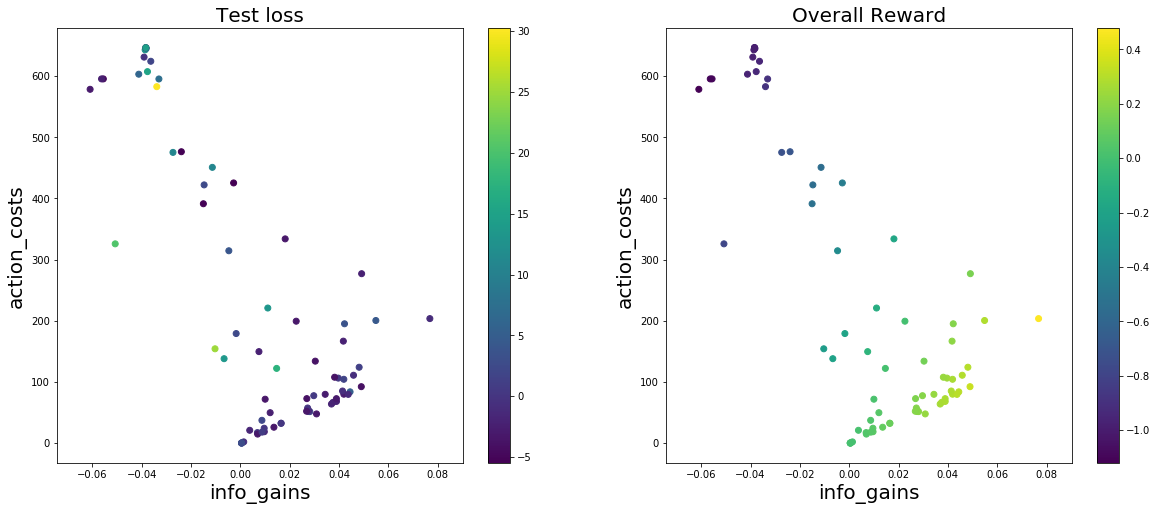

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))


def plot_by_color(the_ax, color, title):
    plot1 = the_ax.scatter(
        df['mean_agent_info_gains'], df['mean_agent_action_costs'], c=color)
    the_ax.set_xlabel('info_gains', fontsize=20)
    the_ax.set_ylabel('action_costs', fontsize=20)
    plt.colorbar(plot1, ax=the_ax)
    the_ax.set_title(title, fontsize=20)


plot_by_color(ax[0], np.log(df['test_loss']), title='Test loss')
plot_by_color(ax[1], df['sum_reward'], title='Overall Reward')

In [49]:
df.sort_values(['sum_reward'], ascending=False).head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,mean_phy_action_costs,mean_rand_info_gains,mean_rand_action_costs,mean_phy_real_info_gains,sum_reward
69,0.353482,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,0.076775,203.511796,0.002307,11.053778,-0.001327,42.693253,0.020491,0.478376
65,0.017993,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,0.048984,92.175494,0.002307,11.053778,-0.001327,42.693253,0.020491,0.342885
13,176.003575,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,0.044428,83.736490,0.002307,11.053778,-0.001327,42.693253,0.020491,0.310852
53,0.313496,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,0.043692,79.565840,0.002307,11.053778,-0.001327,42.693253,0.020491,0.308487
46,3.856784,../models/dqn_mimic-0118_24hrs_random_order_se...,0118_new_est_,../models/0118_rand-StateToStateDiffPerTimeEst...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,0.048112,123.956630,0.002307,11.053778,-0.001327,42.693253,0.020491,0.303352


In [52]:
# Select the point has low test_loss (convergence) and high overall sum_reward
df.iloc[69]

test_loss                                                            0.353482
policy_dir                  ../models/dqn_mimic-0118_24hrs_random_order_se...
identifier                                                      0118_new_est_
reward_estimator_dir        ../models/0118_rand-StateToStateDiffPerTimeEst...
cache_dir                   ../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...
action_cost_coef                                                        0.001
gain_coef                                                                   1
mean_agent_info_gains                                               0.0767753
mean_agent_action_costs                                               203.512
mean_phy_info_gains                                                0.00230718
mean_phy_action_costs                                                 11.0538
mean_rand_info_gains                                              -0.00132676
mean_rand_action_costs                                          

In [53]:
df.iloc[69, :].policy_dir

'../models/dqn_mimic-0118_24hrs_random_order_search-g1-ac1.0e-03-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-4-1-32-lr-0.001-reg-0.001-0.7-s-256-5000-i-50-500-3-1'

## Final plot

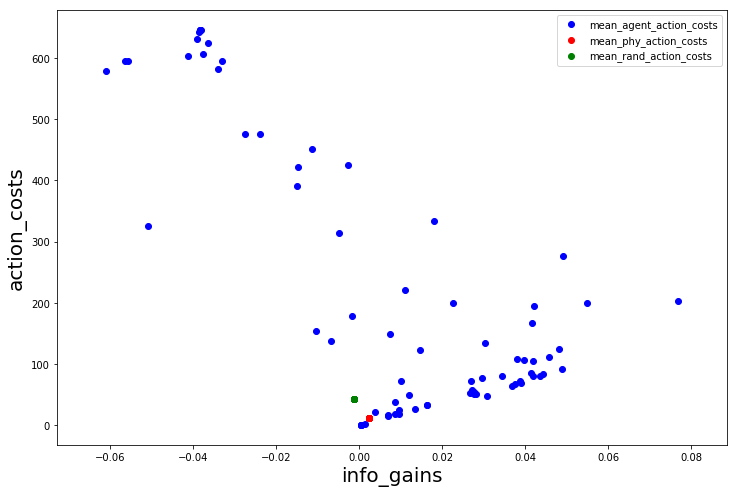

In [54]:
plt.figure(figsize=[12, 8])
plt.scatter(
    df['mean_agent_info_gains'],
    df['mean_agent_action_costs'],
    color='b',
)
plt.scatter(df['mean_phy_info_gains'], df['mean_phy_action_costs'], color='r')
plt.scatter(
    df['mean_rand_info_gains'], df['mean_rand_action_costs'], color='g')
plt.legend(loc='best')
plt.xlabel('info_gains', fontsize=20)
plt.ylabel('action_costs', fontsize=20)
plt.show()

# Analyze 0119 per time value estimation - rand arch search

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv(
    '../policy_training_and_evaluation/estimation/0119_2_new_est_val_regression_summary.csv'
)

In [50]:
df.head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,...,mean_rand_info_gains,mean_rand_action_costs,mean_phy_real_info_gains,val_mean_agent_info_gains,val_mean_agent_action_costs,val_mean_phy_info_gains,val_mean_phy_action_costs,val_mean_rand_info_gains,val_mean_rand_action_costs,val_mean_phy_real_info_gains
0,0.564317,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_2_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.007474,1.871141,-0.007452,...,-0.008696,42.693253,0.020491,-0.003366,1.738204,-0.002673,13.491652,-0.003036,42.612768,0.020264
1,1.249683,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_2_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.000127,32.316655,-0.007452,...,-0.008696,42.693253,0.020491,0.000683,24.279175,-0.002673,13.491652,-0.003036,42.612768,0.020264
2,9.342138,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_2_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.005119,37.140094,-0.007452,...,-0.008696,42.693253,0.020491,-0.000504,38.878414,-0.002673,13.491652,-0.003036,42.612768,0.020264
3,11.402954,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_2_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.015582,179.067055,-0.007452,...,-0.008696,42.693253,0.020491,-0.000822,182.681560,-0.002673,13.491652,-0.003036,42.612768,0.020264
4,0.193226,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_2_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.006533,20.837349,-0.007452,...,-0.008696,42.693253,0.020491,-0.001492,26.216078,-0.002673,13.491652,-0.003036,42.612768,0.020264


In [51]:
df.shape

(75, 21)

In [52]:
df.columns

Index(['test_loss', 'policy_dir', 'identifier', 'reward_estimator_dir',
       'cache_dir', 'action_cost_coef', 'gain_coef', 'mean_agent_info_gains',
       'mean_agent_action_costs', 'mean_phy_info_gains',
       'mean_phy_action_costs', 'mean_rand_info_gains',
       'mean_rand_action_costs', 'mean_phy_real_info_gains',
       'val_mean_agent_info_gains', 'val_mean_agent_action_costs',
       'val_mean_phy_info_gains', 'val_mean_phy_action_costs',
       'val_mean_rand_info_gains', 'val_mean_rand_action_costs',
       'val_mean_phy_real_info_gains'],
      dtype='object')

## Filter model by agent test loss

In [53]:
df['sum_reward'] = df['mean_agent_info_gains'] - df[
    'mean_agent_action_costs'] * df.action_cost_coef[0]
df['val_sum_reward'] = df['val_mean_agent_info_gains'] - df[
    'val_mean_agent_action_costs'] * df.action_cost_coef[0]

In [43]:
df.head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,...,mean_phy_real_info_gains,val_mean_agent_info_gains,val_mean_agent_action_costs,val_mean_phy_info_gains,val_mean_phy_action_costs,val_mean_rand_info_gains,val_mean_rand_action_costs,val_mean_phy_real_info_gains,sum_reward,val_sum_reward
0,0.564317,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_2_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.007474,1.871141,-0.007452,...,0.020491,-0.003366,1.738204,-0.002673,13.491652,-0.003036,42.612768,0.020264,-0.009345,-0.005105
1,1.249683,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_2_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.000127,32.316655,-0.007452,...,0.020491,0.000683,24.279175,-0.002673,13.491652,-0.003036,42.612768,0.020264,-0.032444,-0.023596
2,9.342138,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_2_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.005119,37.140094,-0.007452,...,0.020491,-0.000504,38.878414,-0.002673,13.491652,-0.003036,42.612768,0.020264,-0.042259,-0.039382
3,11.402954,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_2_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.015582,179.067055,-0.007452,...,0.020491,-0.000822,182.681560,-0.002673,13.491652,-0.003036,42.612768,0.020264,-0.194649,-0.183504
4,0.193226,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_2_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.006533,20.837349,-0.007452,...,0.020491,-0.001492,26.216078,-0.002673,13.491652,-0.003036,42.612768,0.020264,-0.027370,-0.027708


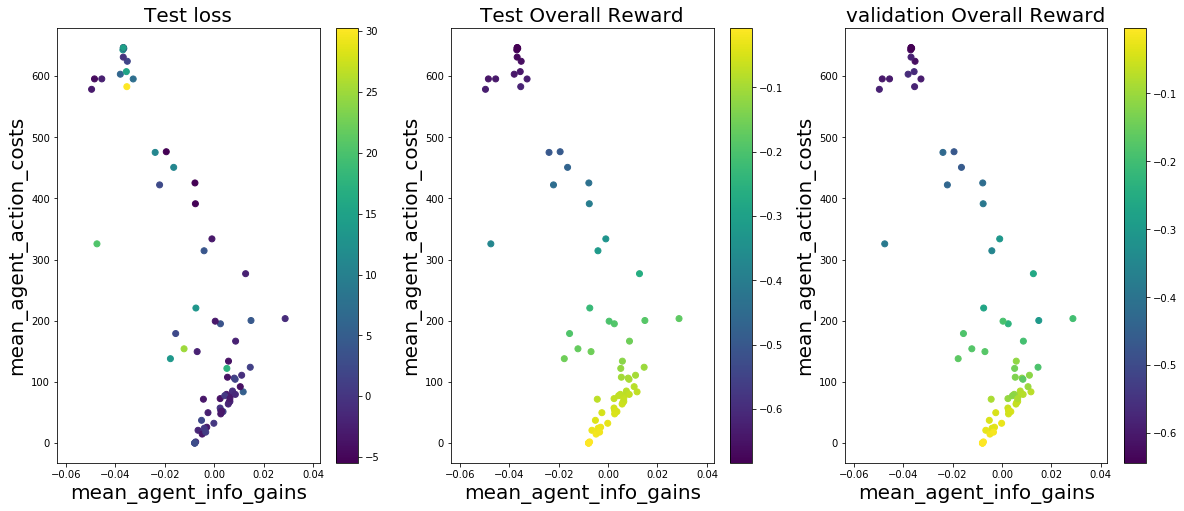

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))


def plot_by_color(the_ax,
                  color,
                  title,
                  xname='mean_agent_info_gains',
                  yname='mean_agent_action_costs'):
    plot1 = the_ax.scatter(df[xname], df[yname], c=color)
    the_ax.set_xlabel(xname, fontsize=20)
    the_ax.set_ylabel(yname, fontsize=20)
    plt.colorbar(plot1, ax=the_ax)
    the_ax.set_title(title, fontsize=20)


plot_by_color(ax[0], np.log(df['test_loss']), title='Test loss')
plot_by_color(ax[1], df['sum_reward'], title='Test Overall Reward')
plot_by_color(ax[2], df['val_sum_reward'], title='validation Overall Reward')

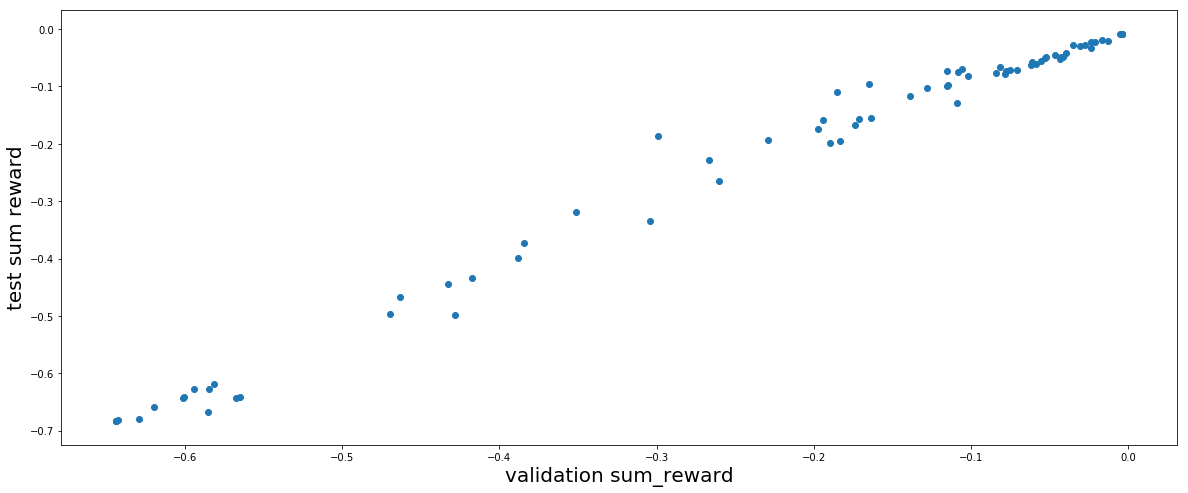

In [61]:
plt.figure(figsize=(20, 8))
plt.scatter(df.val_sum_reward, df.sum_reward)
plt.xlabel('validation sum_reward', fontsize=20)
plt.ylabel('test sum reward', fontsize=20)
plt.show()

In [11]:
df.sort_values(['val_sum_reward'], ascending=False).head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,mean_phy_action_costs,mean_rand_info_gains,mean_rand_action_costs,mean_phy_real_info_gains,sum_reward
28,12.456553,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.007874,0.000000,-0.007452,11.053778,-0.008696,42.693253,0.020491,-0.007874
29,14.196457,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.007874,0.000000,-0.007452,11.053778,-0.008696,42.693253,0.020491,-0.007874
12,23.173969,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.007874,0.000000,-0.007452,11.053778,-0.008696,42.693253,0.020491,-0.007874
44,16.413923,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.007866,0.010450,-0.007452,11.053778,-0.008696,42.693253,0.020491,-0.007877
0,0.564317,../models/dqn_mimic-0118_24hrs_random_order_se...,0119_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.007474,1.871141,-0.007452,11.053778,-0.008696,42.693253,0.020491,-0.009345


In [52]:
# Select the point has low test_loss (convergence) and high overall sum_reward
df.iloc[28]

test_loss                                                            0.353482
policy_dir                  ../models/dqn_mimic-0118_24hrs_random_order_se...
identifier                                                      0118_new_est_
reward_estimator_dir        ../models/0118_rand-StateToStateDiffPerTimeEst...
cache_dir                   ../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...
action_cost_coef                                                        0.001
gain_coef                                                                   1
mean_agent_info_gains                                               0.0767753
mean_agent_action_costs                                               203.512
mean_phy_info_gains                                                0.00230718
mean_phy_action_costs                                                 11.0538
mean_rand_info_gains                                              -0.00132676
mean_rand_action_costs                                          

In [15]:
df.iloc[28, :].policy_dir

'../models/dqn_mimic-0118_24hrs_random_order_search-g1-ac1.0e-03-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-2-1-512-lr-0.0001-reg-0.01-0.7-s-256-5000-i-50-500-3-1'

## Final plot

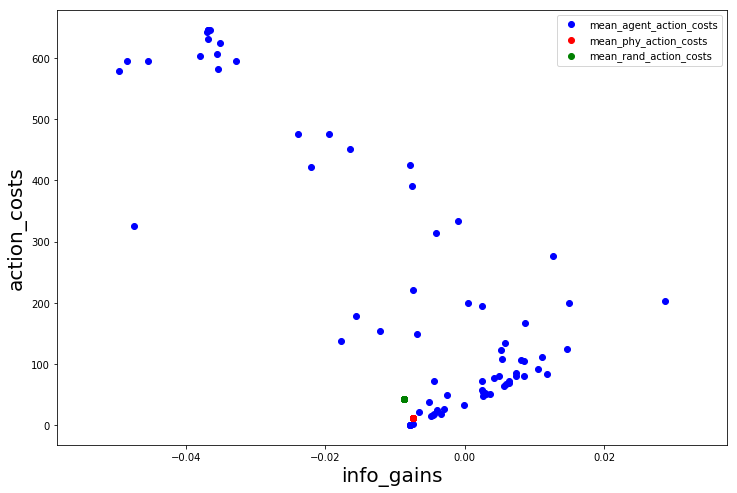

In [16]:
plt.figure(figsize=[12, 8])
plt.scatter(
    df['mean_agent_info_gains'],
    df['mean_agent_action_costs'],
    color='b',
)
plt.scatter(df['mean_phy_info_gains'], df['mean_phy_action_costs'], color='r')
plt.scatter(
    df['mean_rand_info_gains'], df['mean_rand_action_costs'], color='g')
plt.legend(loc='best')
plt.xlabel('info_gains', fontsize=20)
plt.ylabel('action_costs', fontsize=20)
plt.show()

# Analyze 0119 per time value estimation - fixed arch, different action cost

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv(
    '../policy_training_and_evaluation/estimation/0119_ac_roc_val_regression_summary.csv'
)

In [19]:
df.head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,mean_phy_action_costs,mean_rand_info_gains,mean_rand_action_costs,mean_phy_real_info_gains
0,278335.177687,../models/dqn_mimic-0119_24hrs-g1-ac0.0e+00-ga...,0119_ac_roc_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.000,1,-0.036765,646.594842,-0.007452,11.053778,-0.008696,42.693253,0.020491
1,0.000041,../models/dqn_mimic-0119_24hrs-g1-ac1.0e+00-ga...,0119_ac_roc_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,1.000,1,-0.007874,0.000000,-0.007452,11.053778,-0.008696,42.693253,0.020491
2,27.507285,../models/dqn_mimic-0119_24hrs-g1-ac1.0e-01-ga...,0119_ac_roc_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.100,1,0.003848,179.302162,-0.007452,11.053778,-0.008696,42.693253,0.020491
3,52437.703978,../models/dqn_mimic-0119_24hrs-g1-ac1.0e-02-ga...,0119_ac_roc_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.010,1,-0.031887,606.423595,-0.007452,11.053778,-0.008696,42.693253,0.020491
4,127176.049273,../models/dqn_mimic-0119_24hrs-g1-ac1.0e-03-ga...,0119_ac_roc_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.001,1,-0.036765,646.594842,-0.007452,11.053778,-0.008696,42.693253,0.020491


In [20]:
df.shape

(8, 14)

## Filter model by agent test loss

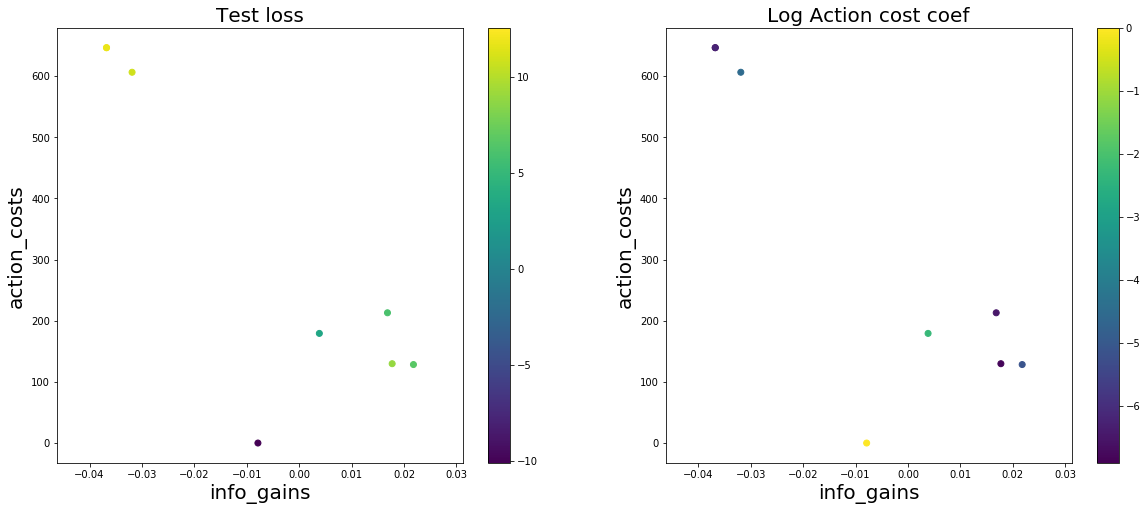

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))


def plot_by_color(the_ax, color, title):
    plot1 = the_ax.scatter(
        df['mean_agent_info_gains'], df['mean_agent_action_costs'], c=color)
    the_ax.set_xlabel('info_gains', fontsize=20)
    the_ax.set_ylabel('action_costs', fontsize=20)
    plt.colorbar(plot1, ax=the_ax)
    the_ax.set_title(title, fontsize=20)


plot_by_color(ax[0], np.log(df['test_loss']), title='Log Test loss')
plot_by_color(
    ax[1],
    np.log(df['action_cost_coef'] + 0.001),
    title='Log Action cost coef')

## Final plot

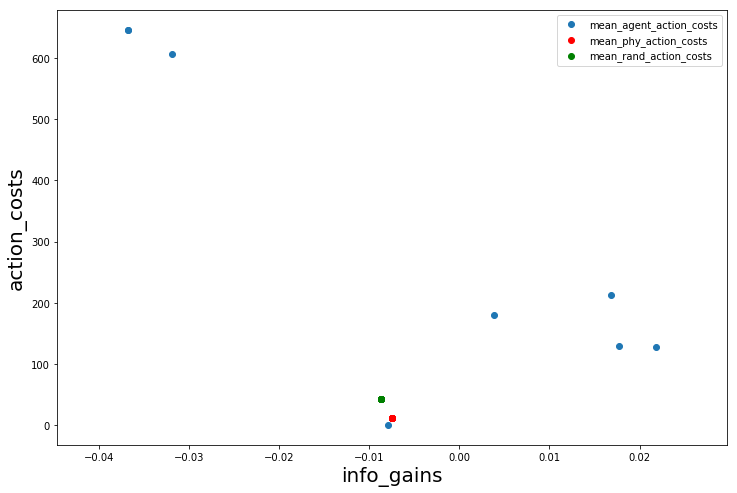

In [30]:
plt.figure(figsize=[12, 8])
plt.scatter(df['mean_agent_info_gains'], df['mean_agent_action_costs'])
plt.scatter(df['mean_phy_info_gains'], df['mean_phy_action_costs'], color='r')
plt.scatter(
    df['mean_rand_info_gains'], df['mean_rand_action_costs'], color='g')
plt.legend(loc='best')
plt.xlabel('info_gains', fontsize=20)
plt.ylabel('action_costs', fontsize=20)
plt.show()

# Analyze 0120 per time value estimation -- random arch, different action cost coeff

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(
    '../policy_training_and_evaluation/estimation/0120_new_est_val_regression_summary.csv'
)

In [3]:
df.head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,...,mean_rand_action_costs,mean_phy_real_info_gains,val_mean_agent_info_gains,val_mean_agent_action_costs,val_mean_phy_info_gains,val_mean_phy_action_costs,val_mean_rand_info_gains,val_mean_rand_action_costs,val_mean_phy_real_info_gains,val_loss
0,0.218816,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.0,1,-0.002911,31.967900,-0.007452,...,42.693253,0.020491,0.000322,36.248755,-0.002673,13.491652,-0.003036,42.612768,0.020264,0.281619
1,725.192447,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.0,1,-0.007804,0.517909,-0.007452,...,42.693253,0.020491,-0.003500,0.358674,-0.002673,13.491652,-0.003036,42.612768,0.020264,745.650193
2,5.520077,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.0,1,-0.007874,0.000000,-0.007452,...,42.693253,0.020491,-0.003548,0.000000,-0.002673,13.491652,-0.003036,42.612768,0.020264,6.063196
3,0.709450,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.0,1,0.006345,68.051422,-0.007452,...,42.693253,0.020491,0.006395,68.569679,-0.002673,13.491652,-0.003036,42.612768,0.020264,0.734145
4,0.015935,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.0,1,-0.024435,442.406997,-0.007452,...,42.693253,0.020491,0.005793,443.263347,-0.002673,13.491652,-0.003036,42.612768,0.020264,0.015691


In [4]:
# the set of action cost coeff
sorted(df.action_cost_coef.unique())

[0.0, 0.0001, 0.0005, 0.001, 0.005, 0.01]

In [5]:
# num runs x recorded attributes
df.shape

(140, 22)

In [6]:
df.columns

Index(['test_loss', 'policy_dir', 'identifier', 'reward_estimator_dir',
       'cache_dir', 'action_cost_coef', 'gain_coef', 'mean_agent_info_gains',
       'mean_agent_action_costs', 'mean_phy_info_gains',
       'mean_phy_action_costs', 'mean_rand_info_gains',
       'mean_rand_action_costs', 'mean_phy_real_info_gains',
       'val_mean_agent_info_gains', 'val_mean_agent_action_costs',
       'val_mean_phy_info_gains', 'val_mean_phy_action_costs',
       'val_mean_rand_info_gains', 'val_mean_rand_action_costs',
       'val_mean_phy_real_info_gains', 'val_loss'],
      dtype='object')

## Filter model by agent test loss

In [7]:
df['sum_reward'] = df['mean_agent_info_gains'] - df[
    'mean_agent_action_costs'] * df.action_cost_coef
df['val_sum_reward'] = df['val_mean_agent_info_gains'] - df[
    'val_mean_agent_action_costs'] * df.action_cost_coef

In [8]:
df.head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,...,val_mean_agent_info_gains,val_mean_agent_action_costs,val_mean_phy_info_gains,val_mean_phy_action_costs,val_mean_rand_info_gains,val_mean_rand_action_costs,val_mean_phy_real_info_gains,val_loss,sum_reward,val_sum_reward
0,0.218816,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.0,1,-0.002911,31.967900,-0.007452,...,0.000322,36.248755,-0.002673,13.491652,-0.003036,42.612768,0.020264,0.281619,-0.002911,0.000322
1,725.192447,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.0,1,-0.007804,0.517909,-0.007452,...,-0.003500,0.358674,-0.002673,13.491652,-0.003036,42.612768,0.020264,745.650193,-0.007804,-0.003500
2,5.520077,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.0,1,-0.007874,0.000000,-0.007452,...,-0.003548,0.000000,-0.002673,13.491652,-0.003036,42.612768,0.020264,6.063196,-0.007874,-0.003548
3,0.709450,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.0,1,0.006345,68.051422,-0.007452,...,0.006395,68.569679,-0.002673,13.491652,-0.003036,42.612768,0.020264,0.734145,0.006345,0.006395
4,0.015935,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.0,1,-0.024435,442.406997,-0.007452,...,0.005793,443.263347,-0.002673,13.491652,-0.003036,42.612768,0.020264,0.015691,-0.024435,0.005793


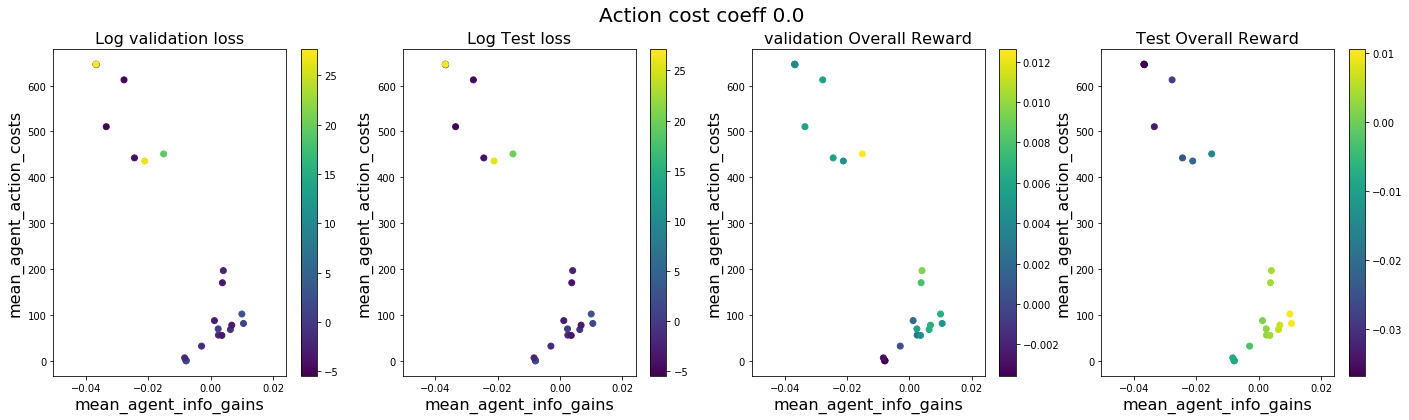

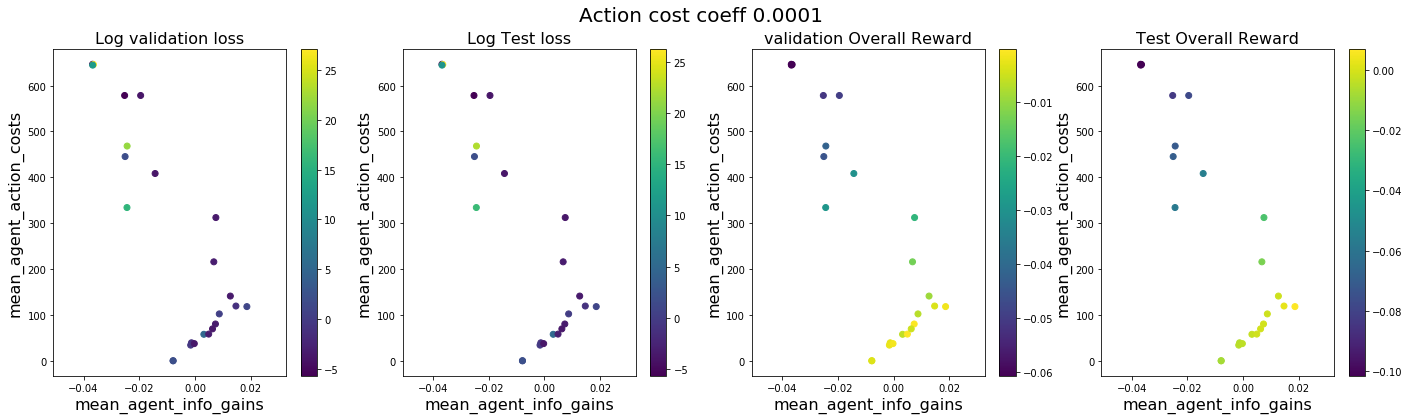

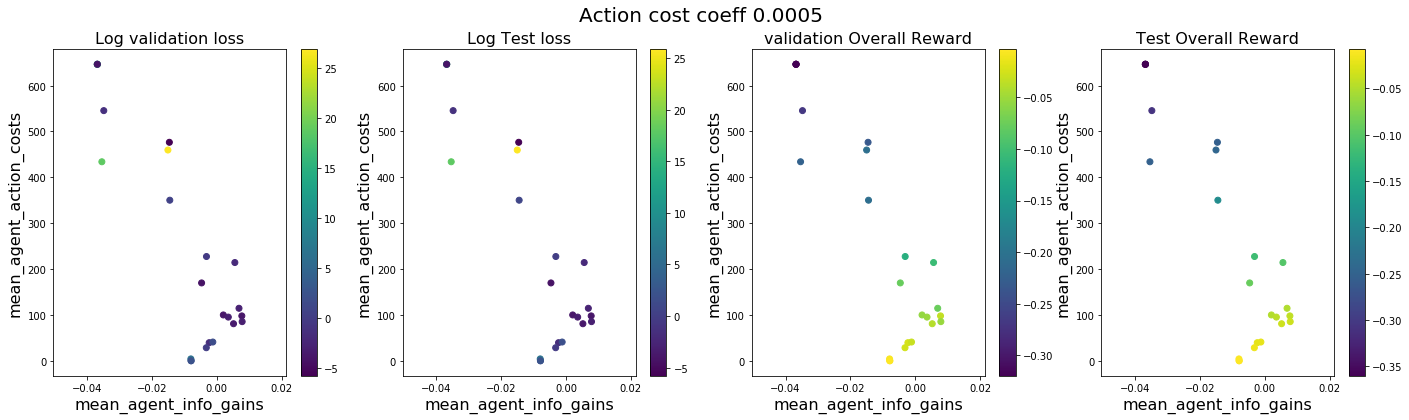

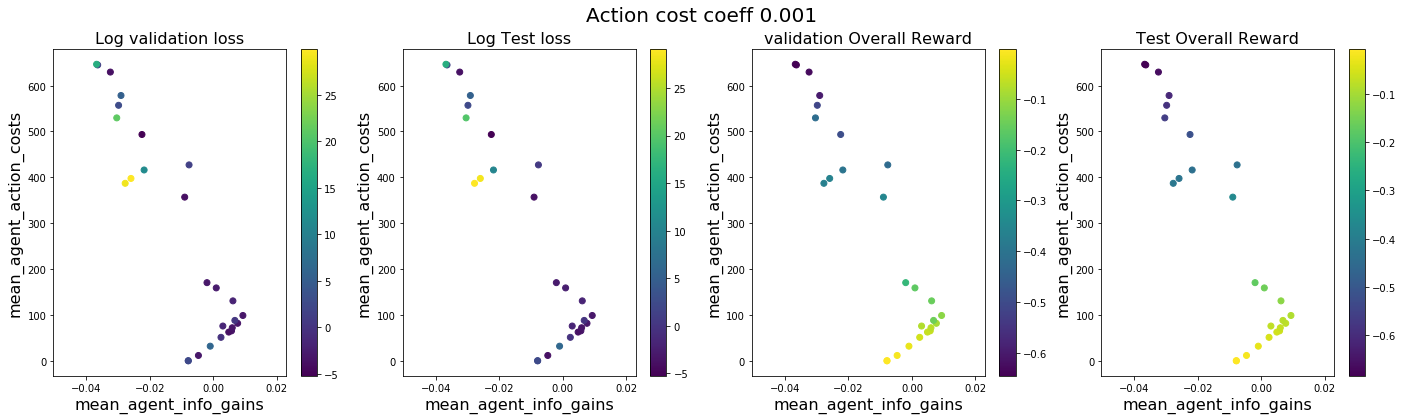

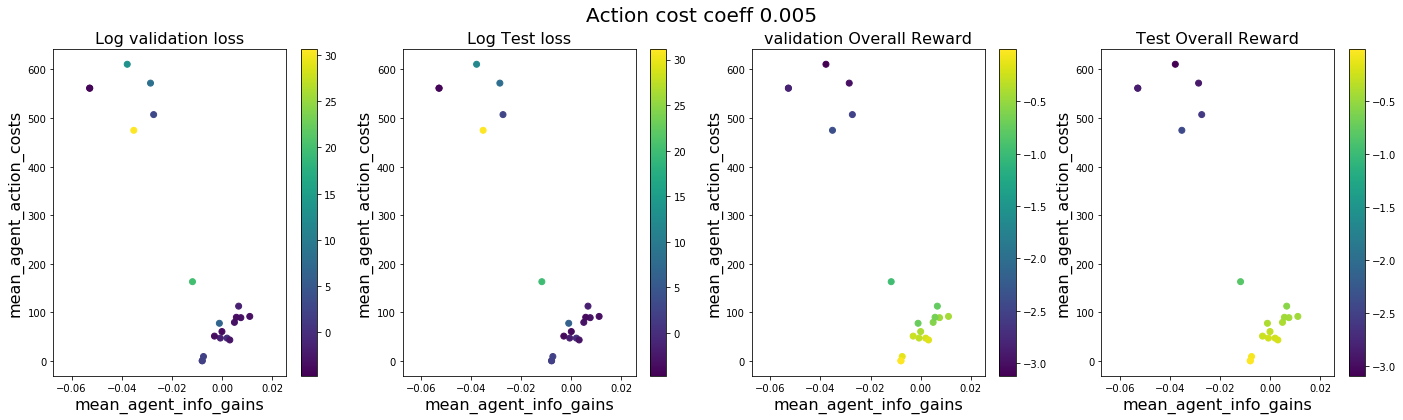

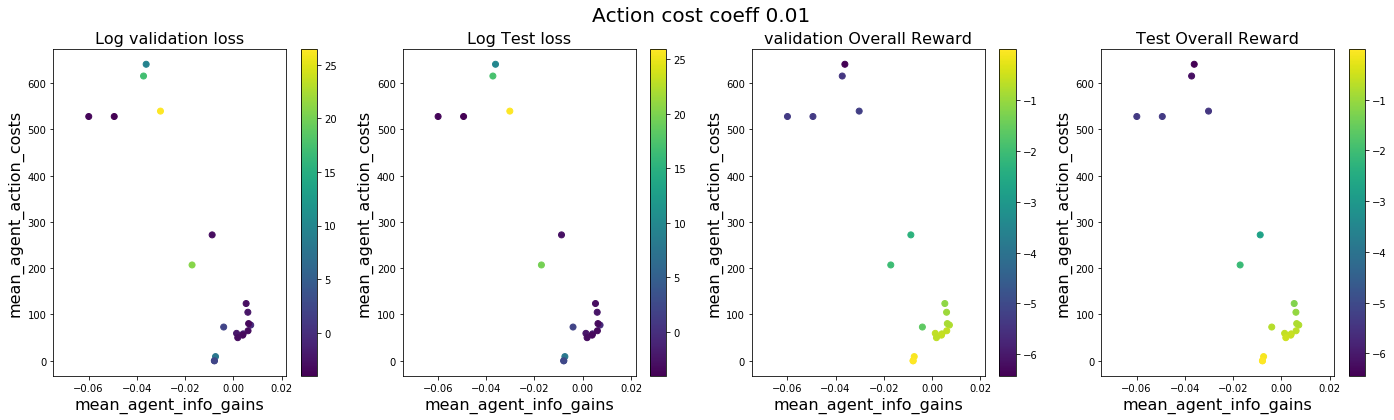

In [9]:
def plot_reward_and_loss(df, title=''):
    fig = plt.figure(figsize=(24, 6))
    fig.suptitle(title, fontsize=20)

    def plot_by_color(ax_name,
                      color,
                      title,
                      xname='mean_agent_info_gains',
                      yname='mean_agent_action_costs'):
        the_ax = plt.subplot(ax_name)
        plot1 = the_ax.scatter(df[xname], df[yname], c=color)
        the_ax.set_xlabel(xname, fontsize=16)
        the_ax.set_ylabel(yname, fontsize=16)
        plt.colorbar(plot1, ax=the_ax)
        the_ax.set_title(title, fontsize=16)

    plot_by_color('141', np.log(df['val_loss']), title='Log validation loss')
    plot_by_color('142', np.log(df['test_loss']), title='Log Test loss')
    plot_by_color(
        '143', df['val_sum_reward'], title='validation Overall Reward')
    plot_by_color('144', df['sum_reward'], title='Test Overall Reward')
    #plt.show()


for cost in sorted(df.action_cost_coef.unique()):
    plot_reward_and_loss(
        df[df.action_cost_coef == cost], title=f'Action cost coeff {cost}')

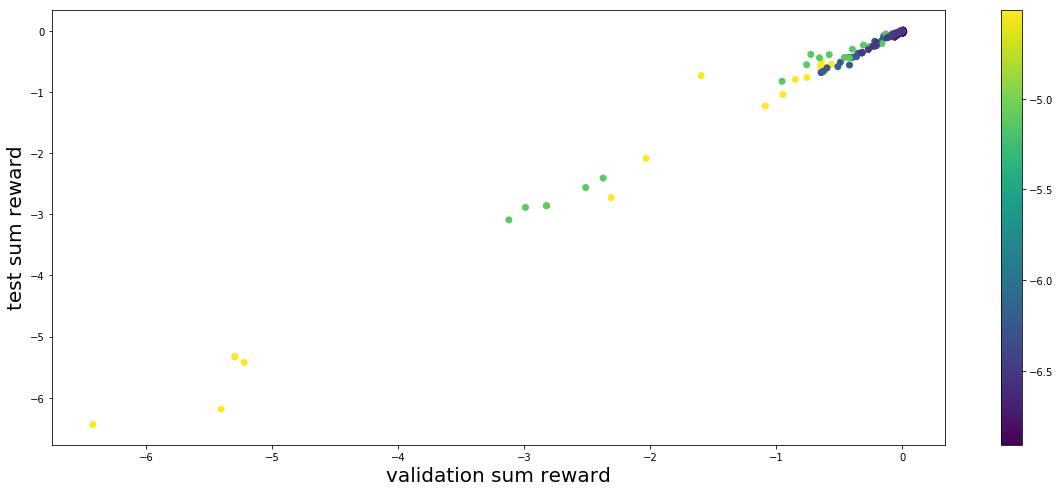

In [10]:
# Scatter plot of test sum reward and validation sum reward
plt.figure(figsize=(20, 8))
plt.scatter(
    df.val_sum_reward, df.sum_reward, c=np.log(df.action_cost_coef + 0.001))
plt.xlabel('validation sum reward', fontsize=20)
plt.ylabel('test sum reward', fontsize=20)
plt.colorbar()
plt.show()

## raw roc plot

In [11]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

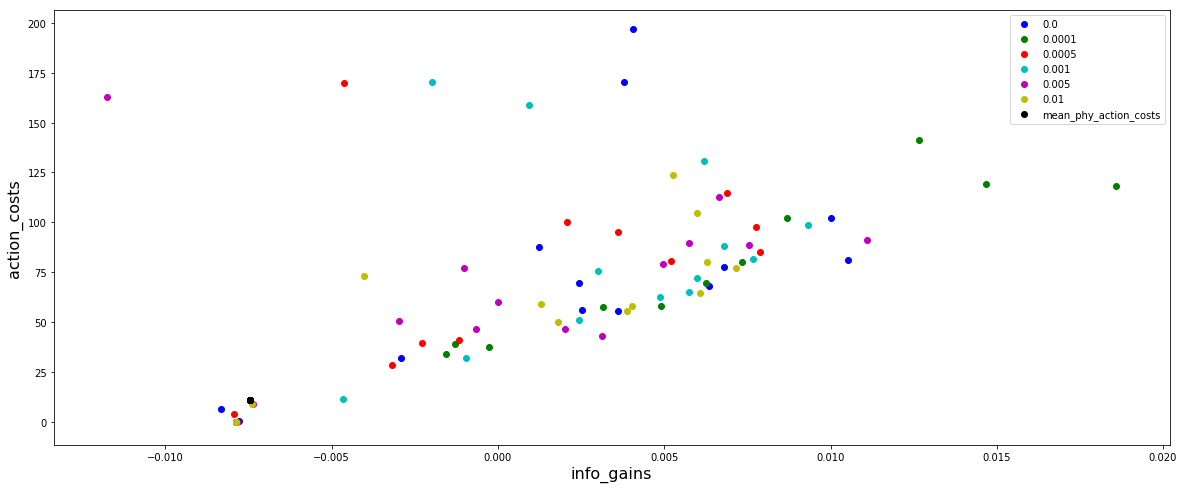

In [12]:
plt.figure(figsize=[20, 8])
for i, coeff in enumerate(sorted(df.action_cost_coef.unique())):
    df_tmp = df[(df.action_cost_coef == coeff)
                & (df.mean_agent_action_costs < 200)]
    plt.scatter(
        df_tmp['mean_agent_info_gains'],
        df_tmp['mean_agent_action_costs'],
        color=colors[i],
        label=coeff)
plt.scatter(
    df_tmp['mean_phy_info_gains'], df_tmp['mean_phy_action_costs'], color='k')
#plt.scatter(
#df_tmp['mean_rand_info_gains'], df_tmp['mean_rand_action_costs'], color='k')
plt.legend(loc='best')
plt.xlabel('info_gains', fontsize=16)
plt.ylabel('action_costs', fontsize=16)
plt.show()

## Select policy by finding roc fonterior using validation set

In [13]:
df_rand_policy = pd.read_csv(
    '../policy_training_and_evaluation/estimation/0121_per_time_rand_random_policy_evaluation.csv'
)

In [14]:
df.reward_estimator_dir[0] == df_rand_policy.reward_estimator_dir[0]

True

In [15]:
df_rand_policy

,cache_dir,mean_rand_action_costs,mean_rand_info_gains,reward_estimator_dir,rnn_dir
0,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,646.594842,-0.036765,../models/0119_new-StateToStateDiffPerTimeEsti...,../models/0117-24hours_39feats_38cov_negsample...
1,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,614.164615,-0.034193,../models/0119_new-StateToStateDiffPerTimeEsti...,../models/0117-24hours_39feats_38cov_negsample...
2,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,581.919647,-0.031764,../models/0119_new-StateToStateDiffPerTimeEsti...,../models/0117-24hours_39feats_38cov_negsample...
3,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,549.675182,-0.029430,../models/0119_new-StateToStateDiffPerTimeEsti...,../models/0117-24hours_39feats_38cov_negsample...
4,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,517.165151,-0.027128,../models/0119_new-StateToStateDiffPerTimeEsti...,../models/0117-24hours_39feats_38cov_negsample...
5,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,484.835641,-0.025155,../models/0119_new-StateToStateDiffPerTimeEsti...,../models/0117-24hours_39feats_38cov_negsample...
6,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,452.420627,-0.023167,../models/0119_new-StateToStateDiffPerTimeEsti...,../models/0117-24hours_39feats_38cov_negsample...
7,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,420.278978,-0.021328,../models/0119_new-StateToStateDiffPerTimeEsti...,../models/0117-24hours_39feats_38cov_negsample...
8,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,387.999528,-0.019690,../models/0119_new-StateToStateDiffPerTimeEsti...,../models/0117-24hours_39feats_38cov_negsample...
9,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,355.515990,-0.018186,../models/0119_new-StateToStateDiffPerTimeEsti...,../models/0117-24hours_39feats_38cov_negsample...


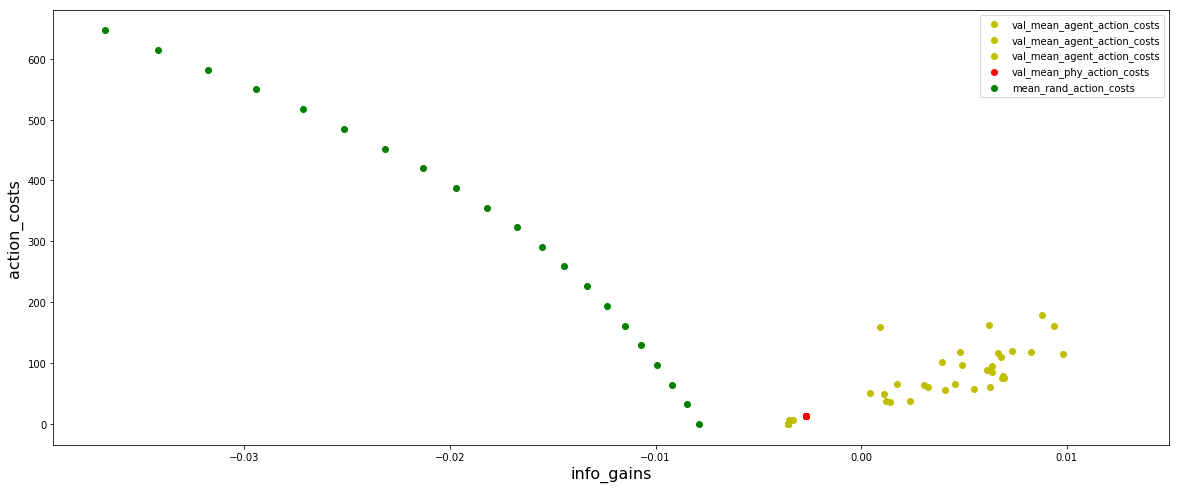

In [16]:
# Validation
plt.figure(figsize=[20, 8])
for i, coeff in enumerate([0.0001, 0.0005, 0.01]):
    df_tmp = df[(df.action_cost_coef == coeff)
                & (df.mean_agent_action_costs < 150)]
    plt.scatter(
        df_tmp['val_mean_agent_info_gains'],
        df_tmp['val_mean_agent_action_costs'],
        color='y',
        #label = coeff
    )
plt.scatter(
    df_tmp['val_mean_phy_info_gains'],
    df_tmp['val_mean_phy_action_costs'],
    color='r')
plt.scatter(
    df_rand_policy.mean_rand_info_gains,
    df_rand_policy.mean_rand_action_costs,
    color='g')
plt.legend(loc='best')
plt.xlabel('info_gains', fontsize=16)
plt.ylabel('action_costs', fontsize=16)
plt.show()

In [17]:
selected_idx = []
for i in range(len(df)):
    if len(df[
        (df.val_mean_agent_action_costs < df.val_mean_agent_action_costs[i])
            & (df.val_mean_agent_info_gains > df.val_mean_agent_info_gains[i])]
           ) == 0 and (df.val_loss[i] <
                       10) and (df.val_mean_agent_action_costs[i] < 400):
        selected_idx.append(i)

In [18]:
selected_df = df[df.index.isin(selected_idx)]

In [19]:
selected_df.head()

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,...,val_mean_agent_info_gains,val_mean_agent_action_costs,val_mean_phy_info_gains,val_mean_phy_action_costs,val_mean_rand_info_gains,val_mean_rand_action_costs,val_mean_phy_real_info_gains,val_loss,sum_reward,val_sum_reward
2,5.520077,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.00,1,-0.007874,0.000000,-0.007452,...,-0.003548,0.000000,-0.002673,13.491652,-0.003036,42.612768,0.020264,6.063196,-0.007874,-0.003548
3,0.709450,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.00,1,0.006345,68.051422,-0.007452,...,0.006395,68.569679,-0.002673,13.491652,-0.003036,42.612768,0.020264,0.734145,0.006345,0.006395
7,9.545627,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.00,1,-0.007874,0.000000,-0.007452,...,-0.003548,0.000000,-0.002673,13.491652,-0.003036,42.612768,0.020264,9.846408,-0.007874,-0.003548
15,0.038033,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.00,1,0.003614,55.316654,-0.007452,...,0.004586,56.855334,-0.002673,13.491652,-0.003036,42.612768,0.020264,0.038304,0.003614,0.004586
22,6.609059,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,0120_new_est_,../models/0119_new-StateToStateDiffPerTimeEsti...,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,0.01,1,-0.007874,0.000000,-0.007452,...,-0.003548,0.000000,-0.002673,13.491652,-0.003036,42.612768,0.020264,6.431185,-0.007874,-0.003548


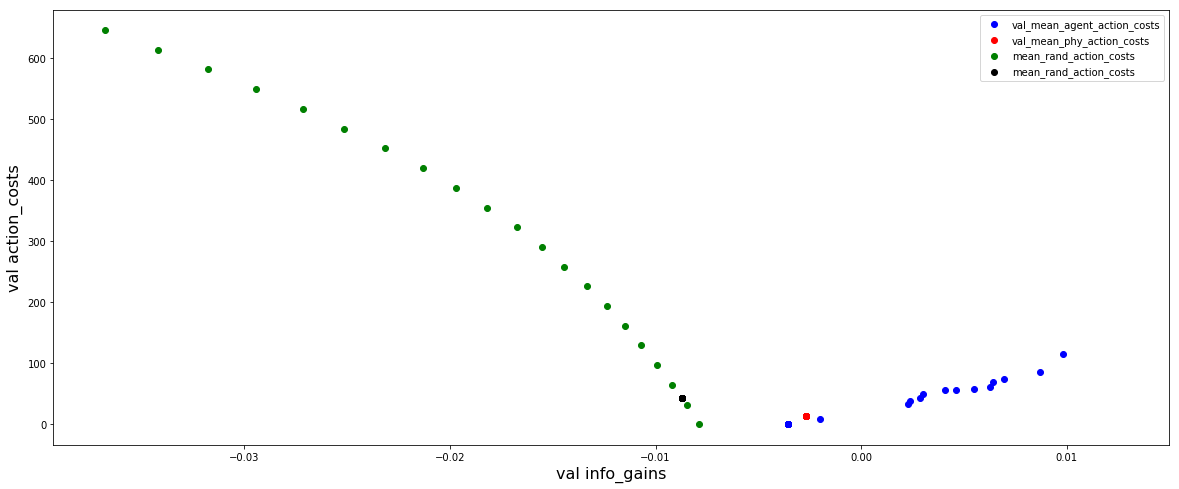

In [20]:
# Validation set final plot
plt.figure(figsize=[20, 8])
# for i, coeff in enumerate([0.0001, 0.0005, 0.01]):
#     df_tmp = selected_df[(selected_df.action_cost_coef == coeff)
#                          & (selected_df.mean_agent_action_costs < 150)]
#     plt.scatter(
#         df_tmp['mean_agent_info_gains'],
#         df_tmp['mean_agent_action_costs'],
#         color='y',
#         #label = coeff
#     )
df_tmp = selected_df
plt.scatter(
    df_tmp['val_mean_agent_info_gains'],
    df_tmp['val_mean_agent_action_costs'],
    color='b'
    #c=np.log(df_tmp.val_loss + 0.001),
    #label = coeff
)
plt.scatter(
    df_tmp['val_mean_phy_info_gains'],
    df_tmp['val_mean_phy_action_costs'],
    color='r')
plt.scatter(
    df_rand_policy.mean_rand_info_gains,
    df_rand_policy.mean_rand_action_costs,
    color='g')
plt.scatter(df.mean_rand_info_gains, df.mean_rand_action_costs, color='k')
plt.legend(loc='best')
plt.xlabel('val info_gains', fontsize=16)
plt.ylabel('val action_costs', fontsize=16)
plt.show()

In [21]:
df_tmp.test_loss

2      5.520077
3      0.709450
7      9.545627
15     0.038033
22     6.609059
36     0.036572
37     0.038478
44     8.796117
49     0.778498
66     0.025831
74     4.689315
76     2.588462
81     8.575311
82     0.051019
88     0.024717
89     0.037135
96     4.348164
97     0.839629
103    8.600822
104    0.054557
112    0.035741
118    7.042144
Name: test_loss, dtype: float64

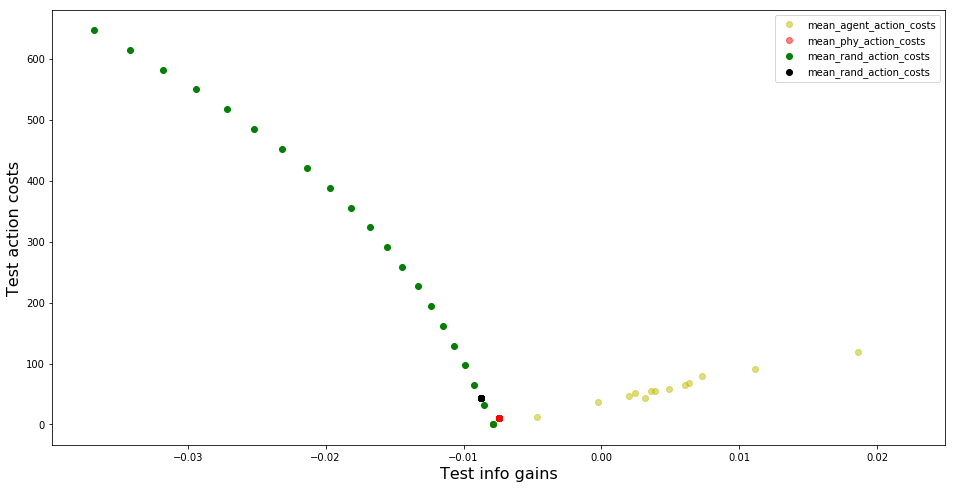

In [22]:
# Test set final plot
plt.figure(figsize=[16, 8])
# for i, coeff in enumerate([0.0001, 0.0005, 0.01]):
#     df_tmp = selected_df[(selected_df.action_cost_coef == coeff)
#                          & (selected_df.mean_agent_action_costs < 150)]
#     plt.scatter(
#         df_tmp['mean_agent_info_gains'],
#         df_tmp['mean_agent_action_costs'],
#         color='y',
#         #label = coeff
#     )
df_tmp = selected_df
plt.scatter(
    df_tmp['mean_agent_info_gains'],
    df_tmp['mean_agent_action_costs'],
    color='y',
    alpha=0.5,
    #label = coeff
)
plt.scatter(
    df_tmp['mean_phy_info_gains'],
    df_tmp['mean_phy_action_costs'],
    color='r',
    alpha=0.5)
plt.scatter(
    df_rand_policy.mean_rand_info_gains,
    df_rand_policy.mean_rand_action_costs,
    color='g')
plt.scatter(df.mean_rand_info_gains, df.mean_rand_action_costs, color='k')
plt.legend(loc='best')
plt.xlabel('Test info gains', fontsize=16)
plt.ylabel('Test action costs', fontsize=16)
plt.show()

In [23]:
# todo: add more random policy
# todo: add more physician point by binning patient's action cost and then calculate
#       corresponding information gain

# Analyze 0120_2 per time value estimation -- random arch, different action cost coeff

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12, 8]
mpl.rcParams['font.size'] = 13

## Load policy evaluation summary

In [5]:
# df = pd.read_csv(
#     '../policy_training_and_evaluation/estimation/2_0121_val_regression_summary.csv'
# )
df = pd.read_csv(
    '../policy_training_and_evaluation/estimation/0314_seq_dqn_val_regression_summary.csv'
)

In [6]:
df.head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,...,mean_rand_action_costs,mean_phy_real_info_gains,val_mean_agent_info_gains,val_mean_agent_action_costs,val_mean_phy_info_gains,val_mean_phy_action_costs,val_mean_rand_info_gains,val_mean_rand_action_costs,val_mean_phy_real_info_gains,val_loss
0,0.591405,../models/dqn_mimic-0314_24hrs_rand_ac_and_arc...,0314_seq_dqn_,../models/0121_with_larger_training_-StateToPr...,useless,0.0,1,-0.011914,30.679475,-0.020711,...,43.812144,0.020491,-0.012368,30.700544,-0.020893,11.386641,-0.023042,43.780216,0.021644,0.712634
1,0.996752,../models/dqn_mimic-0314_24hrs_rand_ac_and_arc...,0314_seq_dqn_,../models/0121_with_larger_training_-StateToPr...,useless,0.0,1,0.044135,101.218252,-0.020711,...,43.812144,0.020491,0.043124,101.106513,-0.020893,11.386641,-0.023042,43.780216,0.021644,1.116676
2,0.070272,../models/dqn_mimic-0314_24hrs_rand_ac_and_arc...,0314_seq_dqn_,../models/0121_with_larger_training_-StateToPr...,useless,0.0,1,0.046128,101.663807,-0.020711,...,43.812144,0.020491,0.044854,101.708397,-0.020893,11.386641,-0.023042,43.780216,0.021644,0.074950
3,415.447547,../models/dqn_mimic-0314_24hrs_rand_ac_and_arc...,0314_seq_dqn_,../models/0121_with_larger_training_-StateToPr...,useless,0.0,1,-0.003091,28.602778,-0.020711,...,43.812144,0.020491,-0.003731,28.586349,-0.020893,11.386641,-0.023042,43.780216,0.021644,435.805283
4,0.107541,../models/dqn_mimic-0314_24hrs_rand_ac_and_arc...,0314_seq_dqn_,../models/0121_with_larger_training_-StateToPr...,useless,0.0,1,0.059368,200.485096,-0.020711,...,43.812144,0.020491,0.057561,200.935077,-0.020893,11.386641,-0.023042,43.780216,0.021644,0.111568


In [7]:
# the set of action cost coeff
sorted(df.action_cost_coef.unique())

[0.0, 0.0001, 0.0005, 0.001, 0.005, 0.01]

In [8]:
# num runs x recorded attributes
df.shape

(163, 22)

In [9]:
df.columns

Index(['test_loss', 'policy_dir', 'identifier', 'reward_estimator_dir',
       'cache_dir', 'action_cost_coef', 'gain_coef', 'mean_agent_info_gains',
       'mean_agent_action_costs', 'mean_phy_info_gains',
       'mean_phy_action_costs', 'mean_rand_info_gains',
       'mean_rand_action_costs', 'mean_phy_real_info_gains',
       'val_mean_agent_info_gains', 'val_mean_agent_action_costs',
       'val_mean_phy_info_gains', 'val_mean_phy_action_costs',
       'val_mean_rand_info_gains', 'val_mean_rand_action_costs',
       'val_mean_phy_real_info_gains', 'val_loss'],
      dtype='object')

## Check if test and validation match in loss and sum of reward

In [10]:
df['sum_reward'] = df['mean_agent_info_gains'] - df[
    'mean_agent_action_costs'] * df.action_cost_coef
df['val_sum_reward'] = df['val_mean_agent_info_gains'] - df[
    'val_mean_agent_action_costs'] * df.action_cost_coef

In [11]:
df.head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,...,val_mean_agent_info_gains,val_mean_agent_action_costs,val_mean_phy_info_gains,val_mean_phy_action_costs,val_mean_rand_info_gains,val_mean_rand_action_costs,val_mean_phy_real_info_gains,val_loss,sum_reward,val_sum_reward
0,0.591405,../models/dqn_mimic-0314_24hrs_rand_ac_and_arc...,0314_seq_dqn_,../models/0121_with_larger_training_-StateToPr...,useless,0.0,1,-0.011914,30.679475,-0.020711,...,-0.012368,30.700544,-0.020893,11.386641,-0.023042,43.780216,0.021644,0.712634,-0.011914,-0.012368
1,0.996752,../models/dqn_mimic-0314_24hrs_rand_ac_and_arc...,0314_seq_dqn_,../models/0121_with_larger_training_-StateToPr...,useless,0.0,1,0.044135,101.218252,-0.020711,...,0.043124,101.106513,-0.020893,11.386641,-0.023042,43.780216,0.021644,1.116676,0.044135,0.043124
2,0.070272,../models/dqn_mimic-0314_24hrs_rand_ac_and_arc...,0314_seq_dqn_,../models/0121_with_larger_training_-StateToPr...,useless,0.0,1,0.046128,101.663807,-0.020711,...,0.044854,101.708397,-0.020893,11.386641,-0.023042,43.780216,0.021644,0.074950,0.046128,0.044854
3,415.447547,../models/dqn_mimic-0314_24hrs_rand_ac_and_arc...,0314_seq_dqn_,../models/0121_with_larger_training_-StateToPr...,useless,0.0,1,-0.003091,28.602778,-0.020711,...,-0.003731,28.586349,-0.020893,11.386641,-0.023042,43.780216,0.021644,435.805283,-0.003091,-0.003731
4,0.107541,../models/dqn_mimic-0314_24hrs_rand_ac_and_arc...,0314_seq_dqn_,../models/0121_with_larger_training_-StateToPr...,useless,0.0,1,0.059368,200.485096,-0.020711,...,0.057561,200.935077,-0.020893,11.386641,-0.023042,43.780216,0.021644,0.111568,0.059368,0.057561


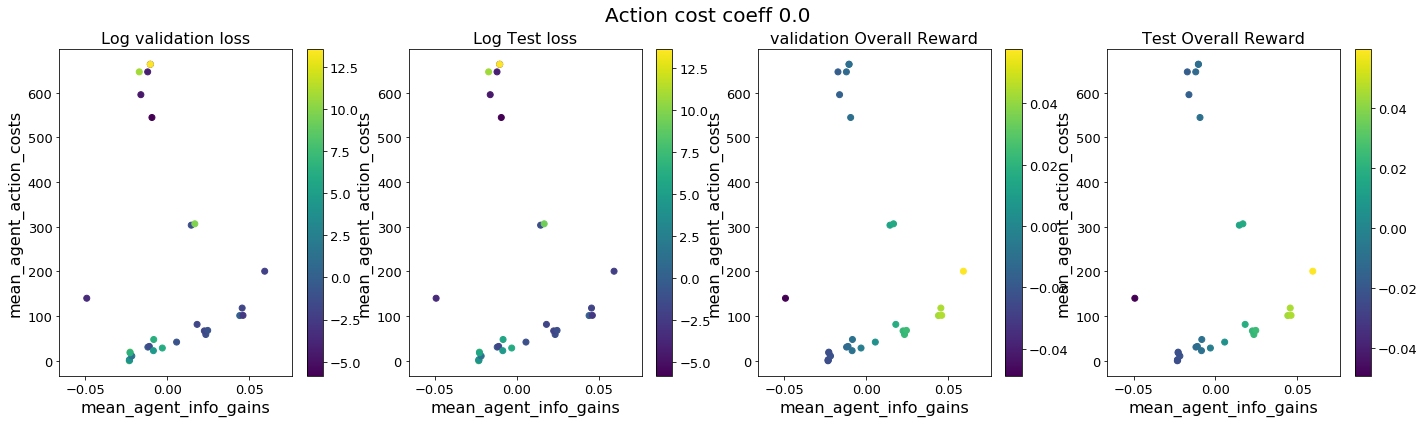

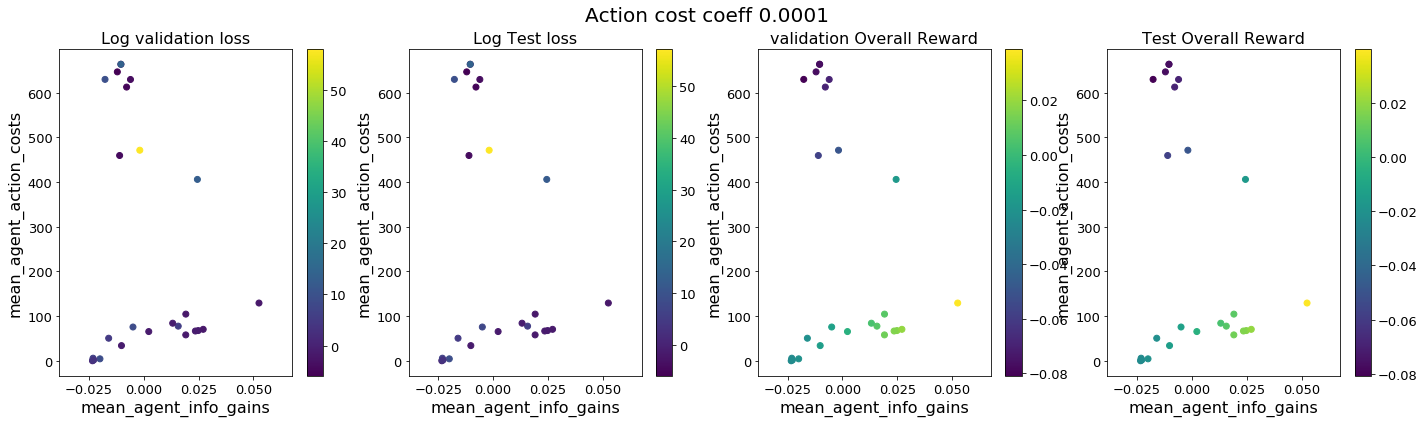

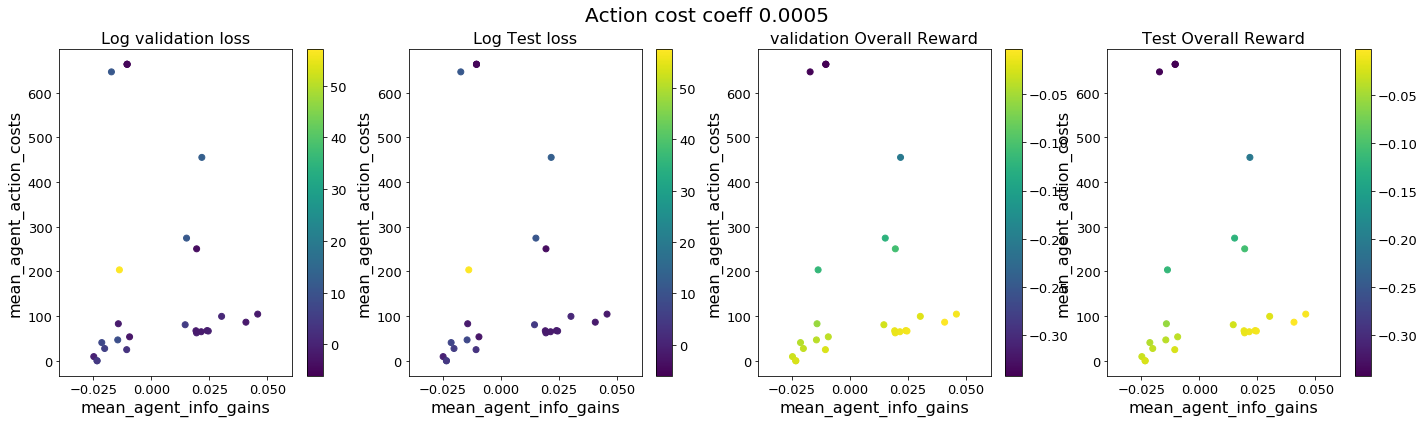

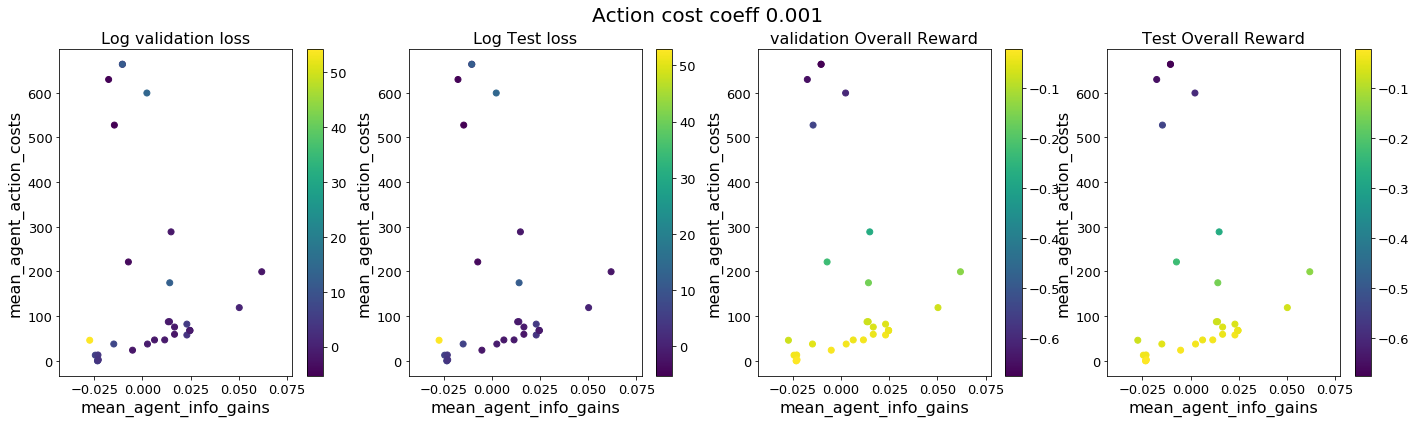

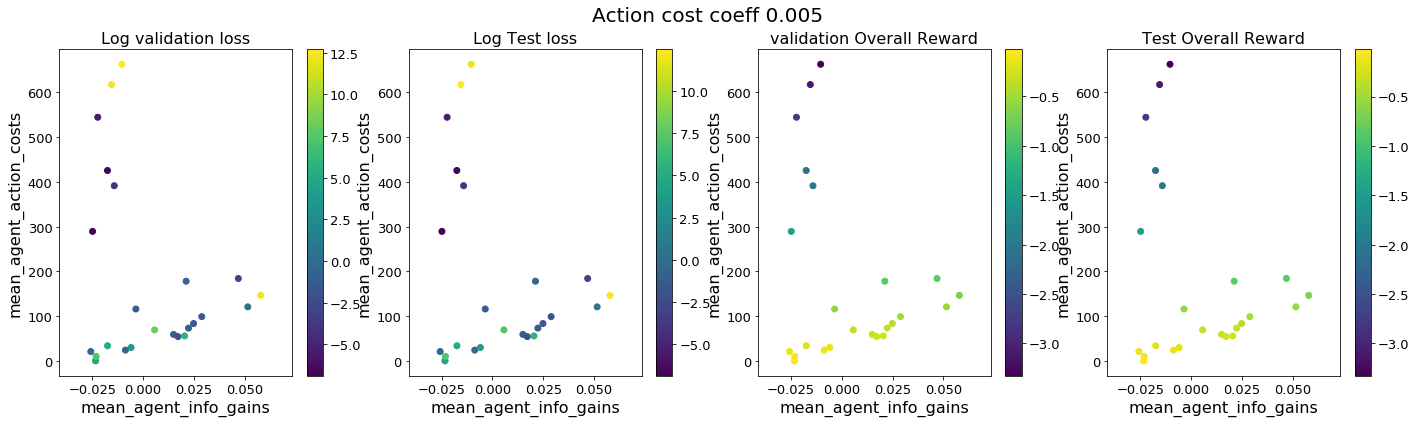

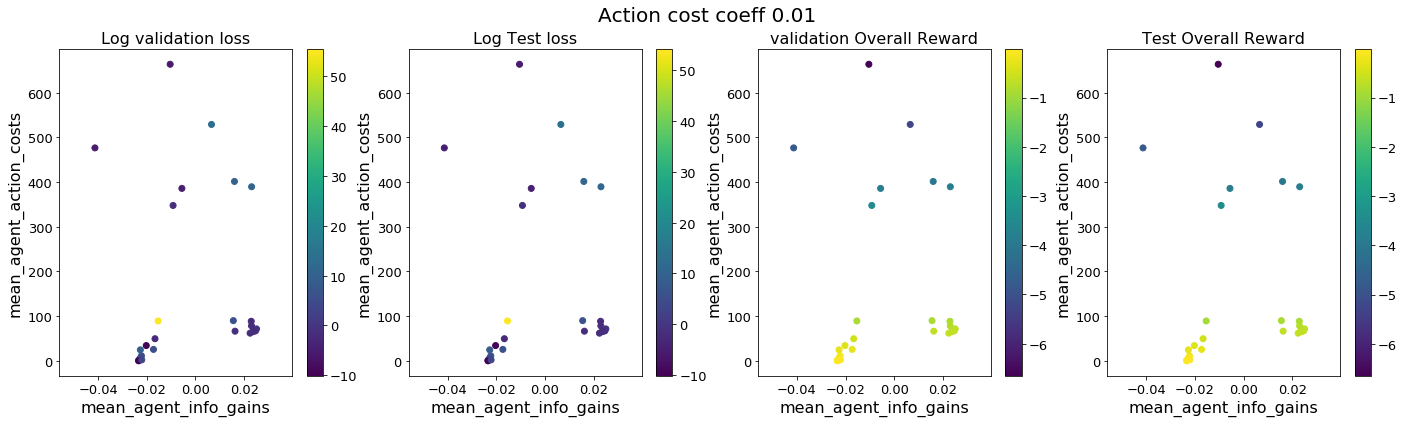

In [12]:
def plot_reward_and_loss(df, title=''):
    fig = plt.figure(figsize=(24, 6))
    fig.suptitle(title, fontsize=20)

    def plot_by_color(ax_name,
                      color,
                      title,
                      xname='mean_agent_info_gains',
                      yname='mean_agent_action_costs'):
        the_ax = plt.subplot(ax_name)
        plot1 = the_ax.scatter(df[xname], df[yname], c=color)
        the_ax.set_xlabel(xname, fontsize=16)
        the_ax.set_ylabel(yname, fontsize=16)
        plt.colorbar(plot1, ax=the_ax)
        the_ax.set_title(title, fontsize=16)

    plot_by_color('141', np.log(df['val_loss']), title='Log validation loss')
    plot_by_color('142', np.log(df['test_loss']), title='Log Test loss')
    plot_by_color(
        '143', df['val_sum_reward'], title='validation Overall Reward')
    plot_by_color('144', df['sum_reward'], title='Test Overall Reward')
    #plt.show()


for cost in sorted(df.action_cost_coef.unique()):
    plot_reward_and_loss(
        df[df.action_cost_coef == cost], title=f'Action cost coeff {cost}')

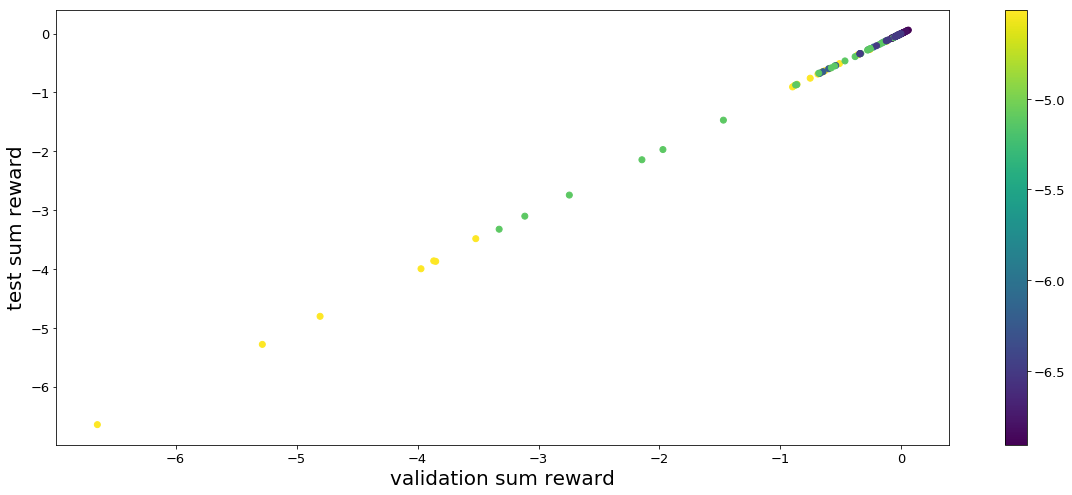

In [13]:
# Scatter plot of test sum reward and validation sum reward
plt.figure(figsize=(20, 8))
plt.scatter(
    df.val_sum_reward, df.sum_reward, c=np.log(df.action_cost_coef + 0.001))
plt.xlabel('validation sum reward', fontsize=20)
plt.ylabel('test sum reward', fontsize=20)
plt.colorbar()
plt.show()

## Raw ROC plot

In [14]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

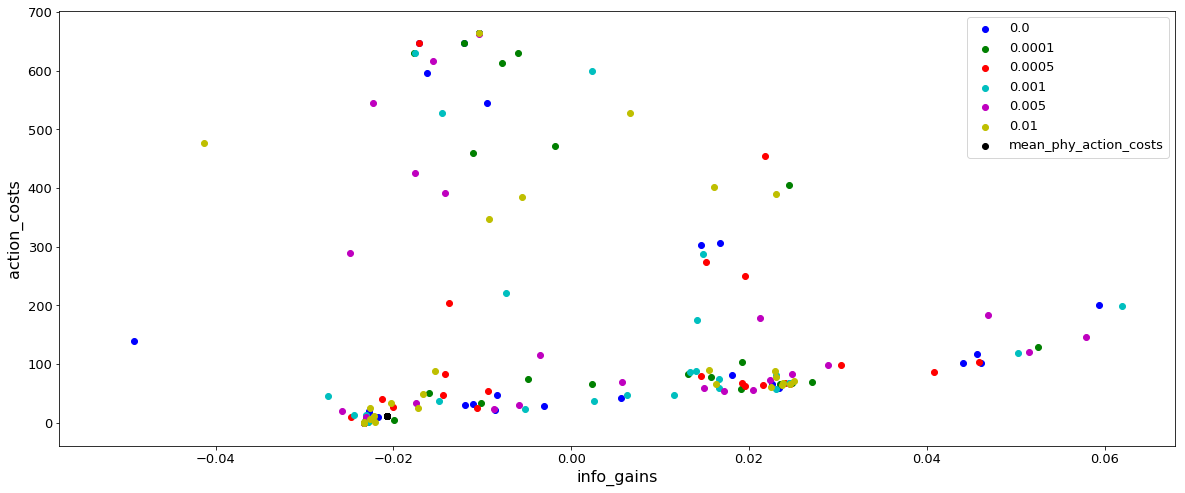

In [15]:
plt.figure(figsize=[20, 8])
for i, coeff in enumerate(sorted(df.action_cost_coef.unique())):
    df_tmp = df[(df.action_cost_coef == coeff)]
    plt.scatter(
        df_tmp['mean_agent_info_gains'],
        df_tmp['mean_agent_action_costs'],
        color=colors[i],
        label=coeff)
plt.scatter(
    df_tmp['mean_phy_info_gains'], df_tmp['mean_phy_action_costs'], color='k')
#plt.scatter(
#df_tmp['mean_rand_info_gains'], df_tmp['mean_rand_action_costs'], color='k')
plt.legend(loc='best')
plt.xlabel('info_gains', fontsize=16)
plt.ylabel('action_costs', fontsize=16)
plt.show()

## Load random policy

In [16]:
df_rand_policy = pd.read_csv(
    '../policy_training_and_evaluation/estimation/2_0122_random_policy__random_policy_evaluation.csv'
)
del df_rand_policy['per_patient_path']
df_rand_policy_2 = pd.read_csv(
    '../policy_training_and_evaluation/estimation/0121_per_time_rand_new_rew_est2_random_policy_evaluation.csv'
)

df_rand_policy = pd.concat([df_rand_policy, df_rand_policy_2])

In [17]:
ac_nor_factor = np.max(df_rand_policy.mean_rand_action_costs)

In [18]:
df_rand_policy.head(2)

,mean_rand_info_gains,mean_rand_action_costs,cache_dir,reward_estimator_dir,rnn_dir
0,-0.022402,66.292026,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,../models/0121_with_larger_training_-StateToPr...,../models/0117-24hours_39feats_38cov_negsample...
1,-0.022809,39.818225,../RL_exp_cache/0117-30mins-24hrs-20order-rnn-...,../models/0121_with_larger_training_-StateToPr...,../models/0117-24hours_39feats_38cov_negsample...


In [19]:
print(df.reward_estimator_dir[0])
print(df_rand_policy.reward_estimator_dir[0])

../models/0121_with_larger_training_-StateToProbGainPerTimeEstimator-0121-hl1-hu64-lr0.001-reg0.0001-kp0.7-n1/
0    ../models/0121_with_larger_training_-StateToPr...
0    ../models/0121_with_larger_training_-StateToPr...
Name: reward_estimator_dir, dtype: object


## load ktail

In [20]:
ktail_df = pd.read_csv('../policy_training_and_evaluation/estimation/0311_indepval_regression_summary.csv')

In [21]:
list(ktail_df.columns)

['test_loss',
 'policy_dir',
 'identifier',
 'reward_estimator_dir',
 'cache_dir',
 'action_cost_coef',
 'gain_coef',
 'mean_agent_info_gains',
 'mean_agent_action_costs',
 'mean_phy_info_gains',
 'mean_phy_action_costs',
 'mean_rand_info_gains',
 'mean_rand_action_costs',
 'mean_phy_real_info_gains',
 'val_mean_agent_info_gains',
 'val_mean_agent_action_costs',
 'val_mean_phy_info_gains',
 'val_mean_phy_action_costs',
 'val_mean_rand_info_gains',
 'val_mean_rand_action_costs',
 'val_mean_phy_real_info_gains',
 'val_loss']

## load agent summary non-time series representaion 

In [22]:
no_time_df = pd.read_csv('../policy_training_and_evaluation/estimation/0313_last_obsval_regression_summary.csv')

In [23]:
list(no_time_df.columns)

['test_loss',
 'policy_dir',
 'identifier',
 'reward_estimator_dir',
 'cache_dir',
 'action_cost_coef',
 'gain_coef',
 'mean_agent_info_gains',
 'mean_agent_action_costs',
 'mean_phy_info_gains',
 'mean_phy_action_costs',
 'mean_rand_info_gains',
 'mean_rand_action_costs',
 'mean_phy_real_info_gains',
 'val_mean_agent_info_gains',
 'val_mean_agent_action_costs',
 'val_mean_phy_info_gains',
 'val_mean_phy_action_costs',
 'val_mean_rand_info_gains',
 'val_mean_rand_action_costs',
 'val_mean_phy_real_info_gains',
 'val_loss']

In [24]:
no_time_df.head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,...,mean_rand_action_costs,mean_phy_real_info_gains,val_mean_agent_info_gains,val_mean_agent_action_costs,val_mean_phy_info_gains,val_mean_phy_action_costs,val_mean_rand_info_gains,val_mean_rand_action_costs,val_mean_phy_real_info_gains,val_loss
0,1.195329e+03,../models/dqn_mimic-0312_obs_input_24hrs_rand_...,0313_last_obs,../models/0121_with_larger_training_-StateToPr...,useless,0.01,1,0.017432,102.085329,-0.020711,...,43.812144,0.020491,0.016607,102.100136,-0.020893,11.386641,-0.023042,43.780216,0.021644,1.244375e+03
1,1.693872e+01,../models/dqn_mimic-0312_obs_input_24hrs_rand_...,0313_last_obs,../models/0121_with_larger_training_-StateToPr...,useless,0.01,1,0.014383,88.546730,-0.020711,...,43.812144,0.020491,0.013596,88.532790,-0.020893,11.386641,-0.023042,43.780216,0.021644,1.769976e+01
2,1.349060e+01,../models/dqn_mimic-0312_obs_input_24hrs_rand_...,0313_last_obs,../models/0121_with_larger_training_-StateToPr...,useless,0.01,1,0.050270,119.109576,-0.020711,...,43.812144,0.020491,0.048956,119.124050,-0.020893,11.386641,-0.023042,43.780216,0.021644,1.342467e+01
3,4.957919e-01,../models/dqn_mimic-0312_obs_input_24hrs_rand_...,0313_last_obs,../models/0121_with_larger_training_-StateToPr...,useless,0.01,1,-0.007954,30.404239,-0.020711,...,43.812144,0.020491,-0.008421,30.354901,-0.020893,11.386641,-0.023042,43.780216,0.021644,5.050289e-01
4,1.656900e+06,../models/dqn_mimic-0312_obs_input_24hrs_rand_...,0313_last_obs,../models/0121_with_larger_training_-StateToPr...,useless,0.01,1,-0.013138,51.009215,-0.020711,...,43.812144,0.020491,-0.013595,50.994521,-0.020893,11.386641,-0.023042,43.780216,0.021644,1.672138e+06


#### Quality check

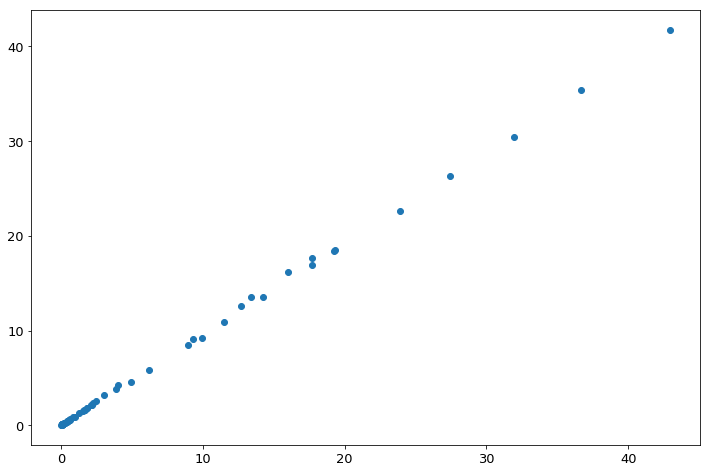

In [25]:
plt.scatter(no_time_df[no_time_df.test_loss < 100].val_loss, no_time_df[no_time_df.test_loss < 100].test_loss)

## Select policy by finding roc fonterior using validation set

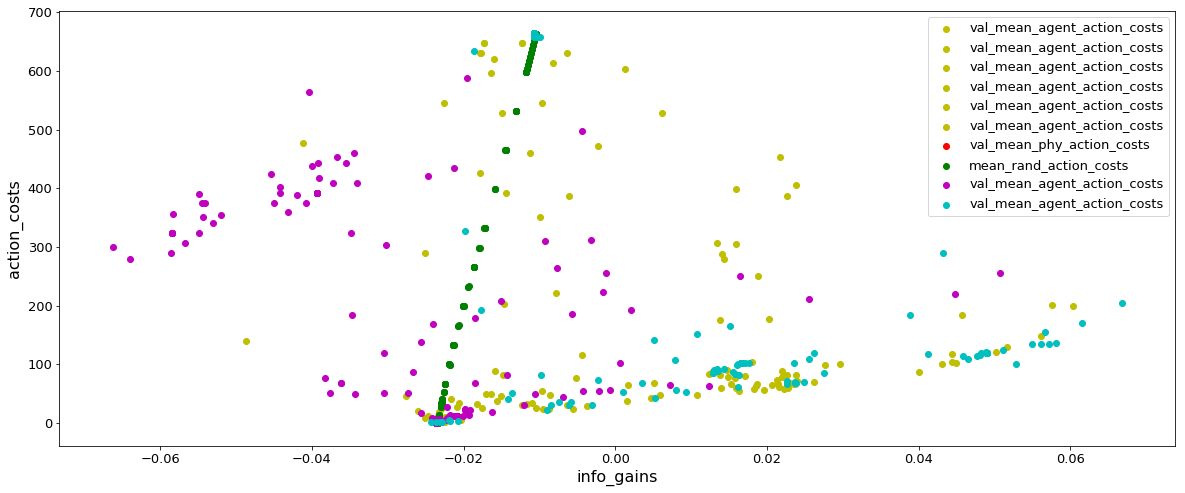

In [26]:
# Validation
plt.figure(figsize=[20, 8])
for i, coeff in enumerate(sorted(df.action_cost_coef.unique())):
    df_tmp = df[(df.action_cost_coef == coeff)]
    plt.scatter(
        df_tmp['val_mean_agent_info_gains'],
        df_tmp['val_mean_agent_action_costs'],
        color='y',
        #label = coeff
    )
plt.scatter(
    df_tmp['val_mean_phy_info_gains'],
    df_tmp['val_mean_phy_action_costs'],
    color='r')
plt.scatter(
    df_rand_policy.mean_rand_info_gains,
    df_rand_policy.mean_rand_action_costs,
    color='g')
plt.scatter(
    ktail_df.val_mean_agent_info_gains,
    ktail_df.val_mean_agent_action_costs,
    color='m')

plt.scatter(
    no_time_df.val_mean_agent_info_gains,
    no_time_df.val_mean_agent_action_costs,
    color='c')
plt.legend(loc='best')
plt.xlabel('info_gains', fontsize=16)
plt.ylabel('action_costs', fontsize=16)
plt.show()

In [27]:
# Validation set selection criterir: no policy should be in its lower right
selected_idx = []
for i in range(len(df)):
    if len(df[
        (df.val_mean_agent_action_costs < df.val_mean_agent_action_costs[i])
            & (df.val_mean_agent_info_gains > df.val_mean_agent_info_gains[i])]
           ) == 0:
        selected_idx.append(i)
selected_df = df[df.index.isin(selected_idx)].reset_index(drop=True)

In [28]:
selected_df.head(2)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,...,val_mean_agent_info_gains,val_mean_agent_action_costs,val_mean_phy_info_gains,val_mean_phy_action_costs,val_mean_rand_info_gains,val_mean_rand_action_costs,val_mean_phy_real_info_gains,val_loss,sum_reward,val_sum_reward
0,0.996752,../models/dqn_mimic-0314_24hrs_rand_ac_and_arc...,0314_seq_dqn_,../models/0121_with_larger_training_-StateToPr...,useless,0.0,1,0.044135,101.218252,-0.020711,...,0.043124,101.106513,-0.020893,11.386641,-0.023042,43.780216,0.021644,1.116676,0.044135,0.043124
1,0.070272,../models/dqn_mimic-0314_24hrs_rand_ac_and_arc...,0314_seq_dqn_,../models/0121_with_larger_training_-StateToPr...,useless,0.0,1,0.046128,101.663807,-0.020711,...,0.044854,101.708397,-0.020893,11.386641,-0.023042,43.780216,0.021644,0.074950,0.046128,0.044854


In [29]:
# Validation set selection criterir: no policy should be in its lower right
selected_idx = []
for i in range(len(ktail_df)):
    if len(ktail_df[
        (ktail_df.val_mean_agent_action_costs < ktail_df.val_mean_agent_action_costs[i])
            & (ktail_df.val_mean_agent_info_gains > ktail_df.val_mean_agent_info_gains[i])]
           ) == 0:
        selected_idx.append(i)
selected_ktail_df = ktail_df[ktail_df.index.isin(selected_idx)].reset_index(drop=True)


In [30]:
selected_ktail_df.head(5)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,...,mean_rand_action_costs,mean_phy_real_info_gains,val_mean_agent_info_gains,val_mean_agent_action_costs,val_mean_phy_info_gains,val_mean_phy_action_costs,val_mean_rand_info_gains,val_mean_rand_action_costs,val_mean_phy_real_info_gains,val_loss
0,4.665830e-05,../models/dqn_mimic-0311_indep_24hrs_rand_ac_a...,0311_indep,../models/0121_with_larger_training_-StateToPr...,useless,0.010,1,-0.023363,0.000000,-0.020711,...,43.812144,0.020491,-0.023673,0.000000,-0.020893,11.386641,-0.023042,43.780216,0.021644,4.801304e-05
1,7.185627e+10,../models/dqn_mimic-0311_indep_24hrs_rand_ac_a...,0311_indep,../models/0121_with_larger_training_-StateToPr...,useless,0.010,1,0.052094,255.236058,-0.020711,...,43.812144,0.020491,0.050781,255.266242,-0.020893,11.386641,-0.023042,43.780216,0.021644,6.674308e+10
2,4.644445e-05,../models/dqn_mimic-0311_indep_24hrs_rand_ac_a...,0311_indep,../models/0121_with_larger_training_-StateToPr...,useless,0.010,1,-0.023363,0.000000,-0.020711,...,43.812144,0.020491,-0.023673,0.000000,-0.020893,11.386641,-0.023042,43.780216,0.021644,4.766979e-05
3,2.873785e+00,../models/dqn_mimic-0311_indep_24hrs_rand_ac_a...,0311_indep,../models/0121_with_larger_training_-StateToPr...,useless,0.010,1,-0.001419,54.346273,-0.020711,...,43.812144,0.020491,-0.002115,54.872089,-0.020893,11.386641,-0.023042,43.780216,0.021644,2.408121e+00
4,2.122687e+00,../models/dqn_mimic-0311_indep_24hrs_rand_ac_a...,0311_indep,../models/0121_with_larger_training_-StateToPr...,useless,0.001,1,0.012943,63.137504,-0.020711,...,43.812144,0.020491,0.012331,63.246069,-0.020893,11.386641,-0.023042,43.780216,0.021644,1.853679e+00


In [31]:
# Validation set selection criterir: no policy should be in its lower right
selected_idx = []
for i in range(len(no_time_df)):
    if len(no_time_df[
        (no_time_df.val_mean_agent_action_costs < no_time_df.val_mean_agent_action_costs[i])
            & (no_time_df.val_mean_agent_info_gains > no_time_df.val_mean_agent_info_gains[i])]
           ) == 0:
        selected_idx.append(i)
selected_no_time_df = no_time_df[no_time_df.index.isin(selected_idx)].reset_index(drop=True)


In [32]:
selected_no_time_df.head(3)

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,...,mean_rand_action_costs,mean_phy_real_info_gains,val_mean_agent_info_gains,val_mean_agent_action_costs,val_mean_phy_info_gains,val_mean_phy_action_costs,val_mean_rand_info_gains,val_mean_rand_action_costs,val_mean_phy_real_info_gains,val_loss
0,935.251623,../models/dqn_mimic-0312_obs_input_24hrs_rand_...,0313_last_obs,../models/0121_with_larger_training_-StateToPr...,useless,0.010,1,0.057614,133.921193,-0.020711,...,43.812144,0.020491,0.056085,133.895514,-0.020893,11.386641,-0.023042,43.780216,0.021644,933.850513
1,2.171878,../models/dqn_mimic-0312_obs_input_24hrs_rand_...,0313_last_obs,../models/0121_with_larger_training_-StateToPr...,useless,0.010,1,0.017053,60.749906,-0.020711,...,43.812144,0.020491,0.016136,60.440953,-0.020893,11.386641,-0.023042,43.780216,0.021644,2.194419
2,22.629852,../models/dqn_mimic-0312_obs_input_24hrs_rand_...,0313_last_obs,../models/0121_with_larger_training_-StateToPr...,useless,0.001,1,0.054366,100.601030,-0.020711,...,43.812144,0.020491,0.052888,100.674451,-0.020893,11.386641,-0.023042,43.780216,0.021644,23.874994


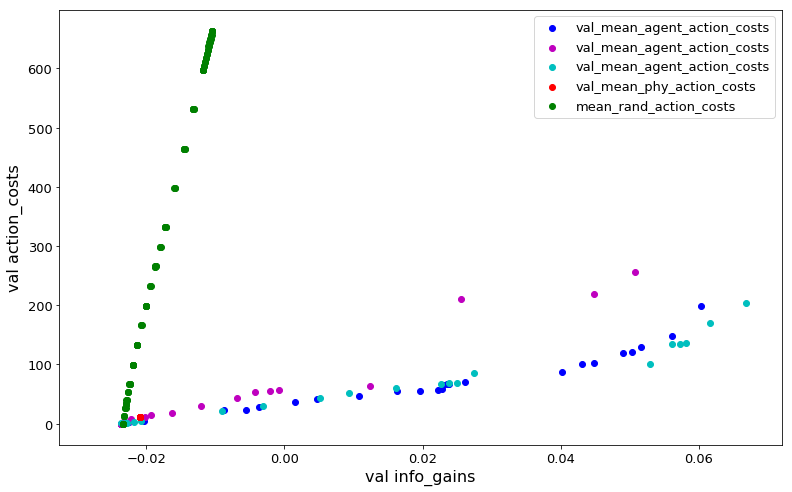

In [33]:
# Validation set final plot
plt.figure(figsize=[8 * 1.618, 8])
df_tmp = selected_df
plt.scatter(
    df_tmp['val_mean_agent_info_gains'],
    df_tmp['val_mean_agent_action_costs'],
    color='b')
plt.scatter(
    selected_ktail_df['val_mean_agent_info_gains'],
    selected_ktail_df['val_mean_agent_action_costs'],
    color='m')
plt.scatter(
    selected_no_time_df['val_mean_agent_info_gains'],
    selected_no_time_df['val_mean_agent_action_costs'],
    color='c')
plt.scatter(
    df_tmp['val_mean_phy_info_gains'],
    df_tmp['val_mean_phy_action_costs'],
    color='r')
plt.scatter(
    df_rand_policy.mean_rand_info_gains,
    df_rand_policy.mean_rand_action_costs,
    color='g')
plt.legend(loc='best')
plt.xlabel('val info_gains', fontsize=16)
plt.ylabel('val action_costs', fontsize=16)
plt.show()

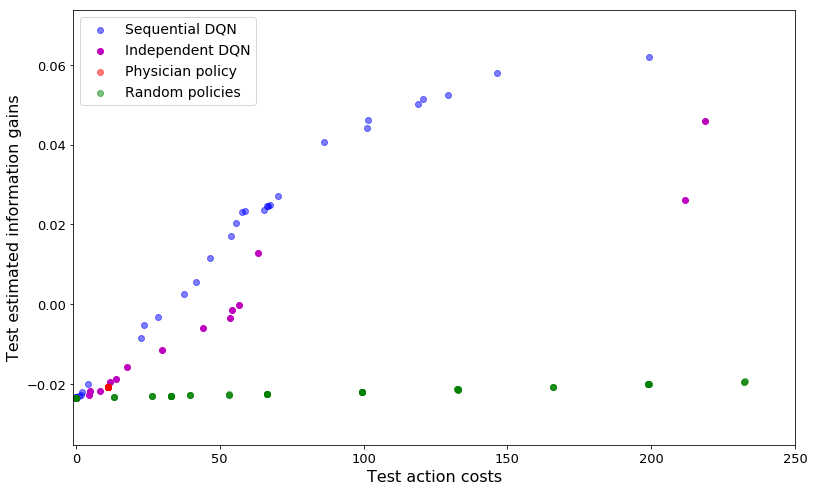

In [34]:
# Test set final plot
plt.figure(figsize=[1.618 * 8, 8])
df_tmp = selected_df
plt.scatter(
    df_tmp['mean_agent_action_costs'],
    df_tmp['mean_agent_info_gains'],
    color='b',
    alpha=0.5,
    label='Sequential DQN')
plt.scatter(
    selected_ktail_df['mean_agent_action_costs'],
    selected_ktail_df['mean_agent_info_gains'],
    color='m',
    label='Independent DQN')
# plt.scatter(
#     selected_no_time_df['mean_agent_action_costs'],
#     selected_no_time_df['mean_agent_info_gains'],
#     color='c',
#     label='RL agent policies (No historical info)')
plt.scatter(
    df_tmp['mean_phy_action_costs'],
    df_tmp['mean_phy_info_gains'],
    color='r',
    alpha=0.5,
    label='Physician policy')
plt.scatter(
    df_rand_policy.mean_rand_action_costs,
    df_rand_policy.mean_rand_info_gains,
    color='g',
    alpha=0.5,
    label='Random policies')
plt.legend(loc='best', fontsize=14)
plt.ylabel('Test estimated information gains', fontsize=16)
plt.xlabel('Test action costs', fontsize=16)
plt.xlim(left=-1, right=250)
plt.show()

In [35]:
np.max(selected_df.mean_agent_action_costs)

199.27973244956192

In [36]:
np.max(selected_ktail_df.mean_agent_action_costs)

255.23605831096882

In [37]:
np.max(selected_no_time_df.mean_agent_action_costs)

204.1878449187896

#### Calculate performance by interpolation

In [38]:
from scipy.interpolate import interp1d

##### x: action cost; y: info gain

In [39]:
interp_fn = interp1d(selected_df.mean_agent_action_costs,
                     selected_df.mean_agent_info_gains)
interp_fn_ktail = interp1d(ktail_df.mean_agent_action_costs,
                     ktail_df.mean_agent_info_gains)

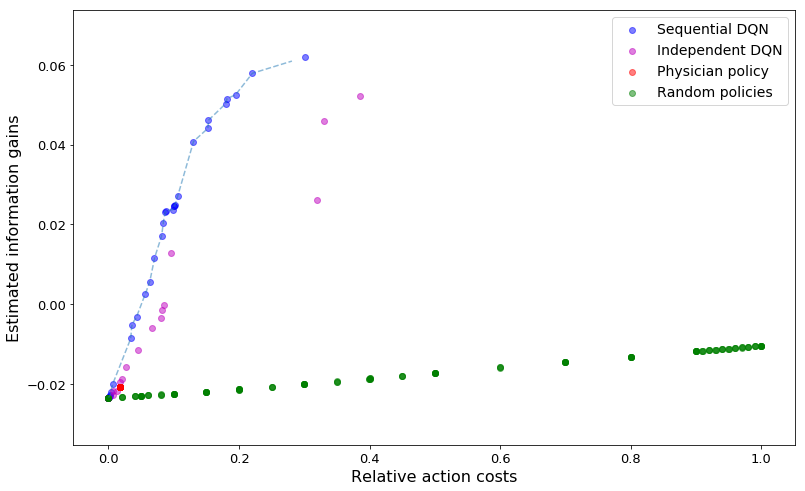

In [42]:
# Test set final plot with interpolation (full)
fig = plt.figure(figsize=[1.618 * 8, 8])
df_tmp = selected_df
plt.scatter(
    df_tmp['mean_agent_action_costs'] / np.max(
        df_rand_policy.mean_rand_action_costs),
    df_tmp['mean_agent_info_gains'],
    color='b',
    alpha=0.5,
    label='Sequential DQN')
plt.scatter(
    selected_ktail_df['mean_agent_action_costs'] / np.max(
        df_rand_policy.mean_rand_action_costs),
    selected_ktail_df['mean_agent_info_gains'],
    color='m',
    alpha=0.5,
    label='Independent DQN')

# plt.scatter(
#     selected_no_time_df['mean_agent_action_costs'] / np.max(
#         df_rand_policy.mean_rand_action_costs),
#     selected_no_time_df['mean_agent_info_gains'],
#     color='k',
#     alpha=0.5,
#     label='RL agent policies (Independent)')

plt.scatter(
    df_tmp['mean_phy_action_costs'] / np.max(
        df_rand_policy.mean_rand_action_costs),
    df_tmp['mean_phy_info_gains'],
    color='r',
    alpha=0.5,
    label='Physician policy')
plt.scatter(
    df_rand_policy.mean_rand_action_costs / np.max(
        df_rand_policy.mean_rand_action_costs),
    df_rand_policy.mean_rand_info_gains,
    color='g',
    alpha=0.5,
    label='Random policies')
plt.plot(
    np.arange(0, 186.91858270411404, 0.5) / np.max(
        df_rand_policy.mean_rand_action_costs),
    interp_fn(np.arange(0, 186.91858270411404, 0.5)),
    '--',
    alpha=0.5)

# plt.plot(
#     np.arange(0, 255.23605831096882, 0.5) / np.max(
#         df_rand_policy.mean_rand_action_costs),
#     interp_fn_ktail(np.arange(0, 255.23605831096882, 0.5)),
#     '--',
#     alpha=0.5)
plt.legend(loc='best', fontsize=14)
plt.ylabel('Estimated information gains', fontsize=16)
plt.xlabel('Relative action costs', fontsize=16)
#plt.xlim(left=-1, right=100)
# plt.ylim(low=-0.02)
plt.show()
fig.savefig(f'paper_190123/reward_roc_full.pdf', bbox_inches='tight', dpi=300)

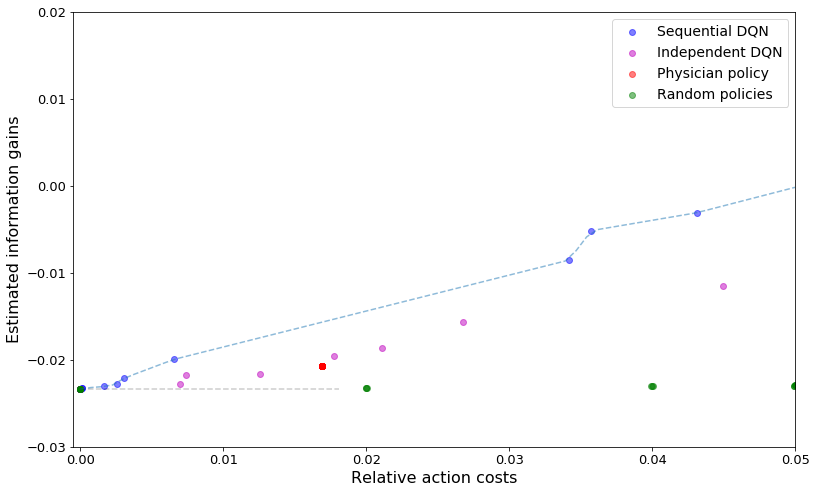

In [43]:
# Test set final plot with interpolation (focus)
fig = plt.figure(figsize=[1.618 * 8, 8])
df_tmp = selected_df
plt.scatter(
    df_tmp['mean_agent_action_costs'] / np.max(
        df_rand_policy.mean_rand_action_costs),
    df_tmp['mean_agent_info_gains'],
    color='b',
    alpha=0.5,
    label='Sequential DQN')
plt.scatter(
    selected_ktail_df['mean_agent_action_costs'] / np.max(
        df_rand_policy.mean_rand_action_costs),
    selected_ktail_df['mean_agent_info_gains'],
    color='m',
    alpha=0.5,
    label='Independent DQN')
plt.scatter(
    df_tmp['mean_phy_action_costs'] / np.max(
        df_rand_policy.mean_rand_action_costs),
    df_tmp['mean_phy_info_gains'],
    color='r',
    alpha=0.5,
    label='Physician policy')
plt.scatter(
    df_rand_policy.mean_rand_action_costs / np.max(
        df_rand_policy.mean_rand_action_costs),
    df_rand_policy.mean_rand_info_gains,
    color='g',
    alpha=0.5,
    label='Random policies')
plt.plot(
    np.arange(0, 186.91858270411404, 0.5) / np.max(
        df_rand_policy.mean_rand_action_costs),
    interp_fn(np.arange(0, 186.91858270411404, 0.5)),
    '--',
    alpha=0.5)

# plt.plot(
#     np.arange(0, 186.91858270411404, 0.5) / np.max(
#         df_rand_policy.mean_rand_action_costs),
#     interp_fn_ktail(np.arange(0, 186.91858270411404, 0.5)),
#     '--',
#     alpha=0.5)

plt.legend(loc='best', fontsize=14)
plt.ylabel('Estimated information gains', fontsize=16)
plt.xlabel('Relative action costs', fontsize=16)
plt.xlim(left=-0.0005, right=0.05)
plt.ylim(bottom=-0.03, top=0.02)

plt.plot(np.arange(0, 12.219239064167251, 0.5) / np.max(
        df_rand_policy.mean_rand_action_costs),
        np.repeat(df_rand_policy.mean_rand_info_gains.min(), len(np.arange(0, 12.219239064167251, 0.5))), 'k--', alpha=0.2)
plt.show()
fig.savefig(f'paper_190123/reward_roc_focus.pdf', bbox_inches='tight', dpi=300)

In [48]:
selected_df.mean_phy_action_costs[0]

11.219239064167251

In [38]:
# percentage increase in information gain given the same action cost
# mean_phy_info_gains is negative
(interp_fn(selected_df.mean_phy_action_costs[0]) -
 selected_df.mean_phy_info_gains[0]) / selected_df.mean_phy_info_gains[0]

-0.38839601799653195

In [31]:
# percentage increase in information gain given the same action cost
# mean_phy_info_gains is negative
(interp_fn_ktail(selected_df.mean_phy_action_costs[0]) -
 selected_df.mean_phy_info_gains[0]) / selected_df.mean_phy_info_gains[0]

-0.039241681366229034

In [43]:
my = interp_fn(selected_df.mean_phy_action_costs[0])
(my - df_rand_policy.mean_rand_info_gains.min()) / (selected_df.mean_phy_info_gains[0] - df_rand_policy.mean_rand_info_gains.min())

4.033266444862326

In [32]:
my = interp_fn_ktail(selected_df.mean_phy_action_costs[0])
(my - df_rand_policy.mean_rand_info_gains.min()) / (selected_df.mean_phy_info_gains[0] - df_rand_policy.mean_rand_info_gains.min())

1.3064667756949675

In [41]:
selected_df.mean_phy_info_gains[0]

-0.02071116923218913

In [42]:
df_rand_policy.mean_rand_info_gains.min()

-0.023363140565422817

##### x: info gain; y: action cost; 

In [172]:
# percentage decrease in action cost given the same information gain
# mean_phy_action_costs is positive
interp_fn = interp1d(selected_df.mean_agent_info_gains,
                     selected_df.mean_agent_action_costs)

(interp_fn(selected_df.mean_phy_info_gains[0]) -
 selected_df.mean_phy_action_costs[0]) / selected_df.mean_phy_action_costs[0]

-0.3123445012813487

In [34]:
interp_fn_ktail = interp1d(selected_ktail_df.mean_agent_info_gains,
                     selected_ktail_df.mean_agent_action_costs)
(interp_fn_ktail(selected_ktail_df.mean_phy_info_gains[0]) -
 selected_ktail_df.mean_phy_action_costs[0]) / selected_ktail_df.mean_phy_action_costs[0]

-0.12030323797483443

## Obtain top policy

In [297]:
# top_df = selected_df[
#     (selected_df.mean_agent_action_costs < selected_df.mean_phy_action_costs)
#     & (selected_df.mean_agent_info_gains > selected_df.mean_phy_info_gains
#        )].reset_index(drop=True)
top_df = selected_df.sort_values(['mean_agent_action_costs'], ascending=True).reset_index(drop=True)
top_df[[
    'mean_phy_action_costs', 'mean_phy_info_gains', 'mean_agent_info_gains',
    'mean_agent_action_costs', 'policy_dir'
]]

,mean_phy_action_costs,mean_phy_info_gains,mean_agent_info_gains,mean_agent_action_costs,policy_dir
0,11.219239,-0.020711,-0.023363,0.000000,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...
1,11.219239,-0.020711,-0.023363,0.000000,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...
2,11.219239,-0.020711,-0.023363,0.000000,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...
3,11.219239,-0.020711,-0.023363,0.000000,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...
4,11.219239,-0.020711,-0.023363,0.000000,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...
5,11.219239,-0.020711,-0.023363,0.000000,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...
6,11.219239,-0.020711,-0.023363,0.000000,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...
7,11.219239,-0.020711,-0.023363,0.000000,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...
8,11.219239,-0.020711,-0.023363,0.000000,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...
9,11.219239,-0.020711,-0.023363,0.000000,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...


In [289]:
top_df.reward_estimator_dir[21]

'../models/0121_with_larger_training_-StateToProbGainPerTimeEstimator-0121-hl1-hu64-lr0.001-reg0.0001-kp0.7-n1/'

In [299]:
for i in range(13, 31):
    print(top_df.policy_dir[i])

../models/dqn_mimic-0120_24hrs_rand_ac_and_arch_-g1-ac0.0e+00-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-3-1-256-lr-1e-05-reg-0.001-0.5-s-256-5000-i-50-500-3-1
../models/dqn_mimic-0120_24hrs_rand_ac_and_arch_-g1-ac1.0e-02-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-1-1-512-lr-0.001-reg-0.0-0.7-s-256-5000-i-50-500-3-1
../models/dqn_mimic-0120_24hrs_rand_ac_and_arch_-g1-ac1.0e-03-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-4-1-64-lr-1e-05-reg-0.001-0.5-s-256-5000-i-50-500-3-1
../models/dqn_mimic-0120_24hrs_rand_ac_and_arch_-g1-ac5.0e-04-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-2-1-128-lr-0.0001-reg-0.0-0.5-s-256-5000-i-50-500-3-1
../models/dqn_mimic-0120_24hrs_rand_ac_and_arch_-g1-ac1.0e-03-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-1-1-512-lr-0.001-reg-0.0-0.7-s-256-5000-i-50-500-3-1
../models/dqn_mimic-0120_24hrs_rand_ac_and_arch_-g1-ac1.0e-04-gamma0.95-fold1.0-only_pos0-sd167-ad40-nn-10000-4-1-256-lr-1e-05-reg-0.001-0.7-s-256-5000-i-50-500-3-1
../models/dqn_mi

## Analyze per patient information gain 

In [187]:
val_summary_fname = '2_0121__val_per_patient_summary.csv'
test_summary_fname = '2_0121__test_per_patient_summary.csv'

In [188]:
# policy selected by the above method
print(f'Number of selected policy: {len(selected_df)}')
selected_df.head()

Number of selected policy: 32


,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,mean_phy_info_gains,...,val_mean_agent_info_gains,val_mean_agent_action_costs,val_mean_phy_info_gains,val_mean_phy_action_costs,val_mean_rand_info_gains,val_mean_rand_action_costs,val_mean_phy_real_info_gains,val_loss,sum_reward,val_sum_reward
0,5.520077,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,2_0121_,../models/0121_with_larger_training_-StateToPr...,../RL_exp_cache/0121-30mins-24hrs-20order-rnn-...,0.0,1,-0.023363,0.000000,-0.020711,...,-0.023673,0.000000,-0.020893,11.386641,-0.023042,43.780216,0.021644,6.063196,-0.023363,-0.023673
1,725.192447,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,2_0121_,../models/0121_with_larger_training_-StateToPr...,../RL_exp_cache/0121-30mins-24hrs-20order-rnn-...,0.0,1,-0.023193,0.517909,-0.020711,...,-0.023493,0.557770,-0.020893,11.386641,-0.023042,43.780216,0.021644,745.650193,-0.023193,-0.023493
2,0.709450,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,2_0121_,../models/0121_with_larger_training_-StateToPr...,../RL_exp_cache/0121-30mins-24hrs-20order-rnn-...,0.0,1,0.024546,68.055855,-0.020711,...,0.023550,67.981549,-0.020893,11.386641,-0.023042,43.780216,0.021644,0.734145,0.024546,0.023550
3,4.098984,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,2_0121_,../models/0121_with_larger_training_-StateToPr...,../RL_exp_cache/0121-30mins-24hrs-20order-rnn-...,0.0,1,0.025711,81.354395,-0.020711,...,0.024670,81.156215,-0.020893,11.386641,-0.023042,43.780216,0.021644,3.692834,0.025711,0.024670
4,0.214213,../models/dqn_mimic-0120_24hrs_rand_ac_and_arc...,2_0121_,../models/0121_with_larger_training_-StateToPr...,../RL_exp_cache/0121-30mins-24hrs-20order-rnn-...,0.0,1,0.014998,55.984217,-0.020711,...,0.014348,55.107302,-0.020893,11.386641,-0.023042,43.780216,0.021644,0.179234,0.014998,0.014348


In [190]:
# check out an example of selected policy
example_policy_dir = top_df.policy_dir[0]
example_val_summary = pd.read_csv(
    os.path.join(example_policy_dir, val_summary_fname))
example_test_summary = pd.read_csv(
    os.path.join(example_policy_dir, test_summary_fname))
example_val_summary.head()

,patient_inds,mortality,agent_action_costs,agent_info_gains,phy_action_costs,phy_info_gains,phy_real_info_gains,rand_action_costs,rand_info_gains
0,5,0,0.0,-0.040556,12.068781,-0.023576,0.014279,50.944883,-0.038622
1,8,0,0.0,-0.038125,0.000000,-0.038125,0.030570,50.299711,-0.041780
2,17,1,0.0,0.019336,18.001879,0.017704,0.166053,44.758261,0.017385
3,21,0,0.0,-0.005000,0.000000,-0.005000,0.000221,45.540684,-0.000779
4,22,0,0.0,-0.008561,33.079283,0.020450,-0.018896,39.127221,-0.007573


### Analyze binned real/est phy info gain vs action cost

#### Raw

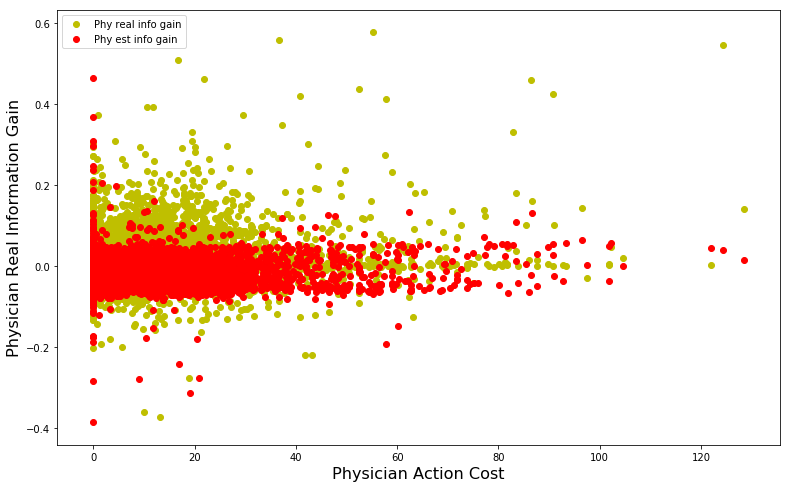

In [191]:
# plot real gain vs cost in phy policy (Test set)
plt.figure(figsize=(8 * 1.618, 8))
plt.scatter(
    example_test_summary.phy_action_costs,
    example_test_summary.phy_real_info_gains,
    color='y',
    label='Phy real info gain'),
plt.scatter(
    example_test_summary.phy_action_costs,
    example_test_summary.phy_info_gains,
    color='r',
    label='Phy est info gain')
plt.legend(loc='best')
plt.xlabel('Physician Action Cost', fontsize=16.18)
plt.ylabel('Physician Real Information Gain', fontsize=16.18)
plt.show()

In [192]:
example_test_summary.columns

Index(['patient_inds', 'mortality', 'agent_action_costs', 'agent_info_gains',
       'phy_action_costs', 'phy_info_gains', 'phy_real_info_gains',
       'rand_action_costs', 'rand_info_gains'],
      dtype='object')

#### binned with error bar

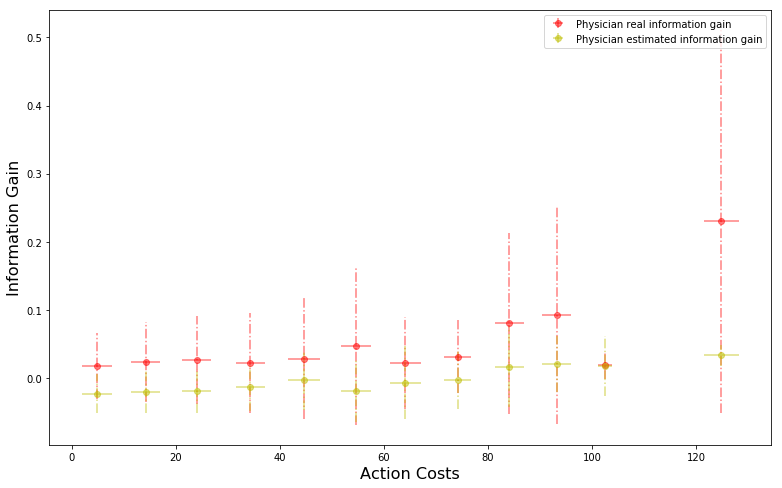

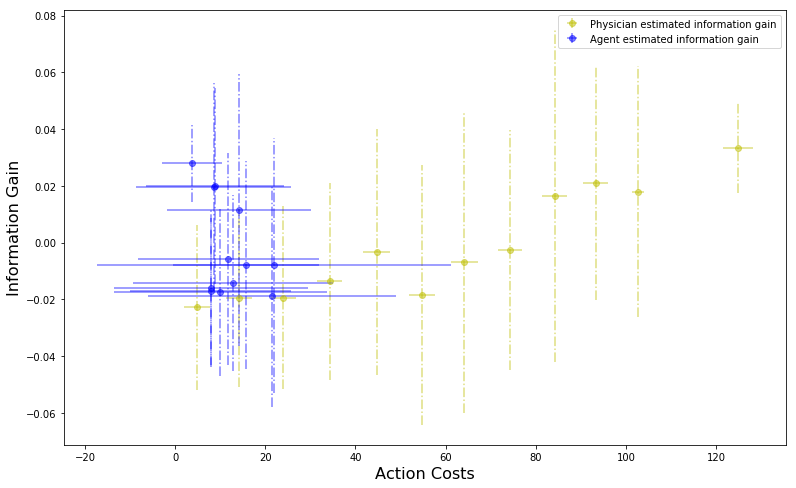

In [199]:
# plot binned real/est information gain vs action cost for physician policy
binned_real_info_gain_mean, binned_real_info_gain_std, \
 binned_est_info_gain_mean, binned_est_info_gain_std, \
 binned_action_cost_mean, binned_action_cost_std, \
 binned_agent_info_gain_mean, binned_agent_info_gain_std, \
 binned_agent_action_cost_mean, binned_agent_action_cost_std, \
= [], [], [], [], [], [], [], [], [], []

interval = 10
for i in np.arange(0, 200, interval):
    tmp = example_test_summary[
        (example_test_summary.phy_action_costs < i + interval)
        & (example_test_summary.phy_action_costs > i)]
    binned_real_info_gain_mean.append(tmp.phy_real_info_gains.mean())
    binned_real_info_gain_std.append(tmp.phy_real_info_gains.std())
    binned_action_cost_mean.append(tmp.phy_action_costs.mean())
    binned_action_cost_std.append(tmp.phy_action_costs.std())
    binned_est_info_gain_mean.append(tmp.phy_info_gains.mean())
    binned_est_info_gain_std.append(tmp.phy_info_gains.std())

    binned_agent_info_gain_mean.append(tmp.agent_info_gains.mean())
    binned_agent_info_gain_std.append(tmp.agent_info_gains.std())
    binned_agent_action_cost_mean.append(tmp.agent_action_costs.mean())
    binned_agent_action_cost_std.append(tmp.agent_action_costs.std())

# plot gain vs test in phy policy
plt.figure(figsize=(8 * 1.618, 8))

eb = plt.errorbar(
    binned_action_cost_mean,
    np.array(binned_real_info_gain_mean),
    yerr=np.array(binned_real_info_gain_std),
    xerr=np.array(binned_action_cost_std),
    color='r',
    label='Physician real information gain',
    fmt='o',
    alpha=0.5)
#eb[-1][0].set_linestyle('--')
eb[-1][1].set_linestyle('-.')

eb = plt.errorbar(
    binned_action_cost_mean,
    np.array(binned_est_info_gain_mean),
    yerr=np.array(binned_est_info_gain_std),
    xerr=np.array(binned_action_cost_std),
    color='y',
    label='Physician estimated information gain',
    fmt='o',
    alpha=0.5)
#eb[-1][0].set_linestyle('--')
eb[-1][1].set_linestyle('-.')

plt.xlabel('Action Costs', fontsize=16.18)
plt.ylabel('Information Gain', fontsize=16.18),
plt.legend(loc='best')
#plt.xlim(right=150)
plt.show()

plt.figure(figsize=(8 * 1.618, 8))
eb = plt.errorbar(
    binned_action_cost_mean,
    np.array(binned_est_info_gain_mean),
    yerr=np.array(binned_est_info_gain_std),
    xerr=np.array(binned_action_cost_std),
    color='y',
    label='Physician estimated information gain',
    fmt='o',
    alpha=0.5)
#eb[-1][0].set_linestyle('--')
eb[-1][1].set_linestyle('-.')

eb = plt.errorbar(
    binned_agent_action_cost_mean,
    binned_agent_info_gain_mean,
    yerr=binned_agent_info_gain_std,
    xerr=binned_agent_action_cost_std,
    color='b',
    label='Agent estimated information gain',
    fmt='o',
    alpha=0.5)
#eb[-1][0].set_linestyle('--')
eb[-1][1].set_linestyle('-.')

plt.xlabel('Action Costs', fontsize=16.18)
plt.ylabel('Information Gain', fontsize=16.18),
plt.legend(loc='best')
#plt.xlim(right=150)
plt.show()

#### Binned without error bar

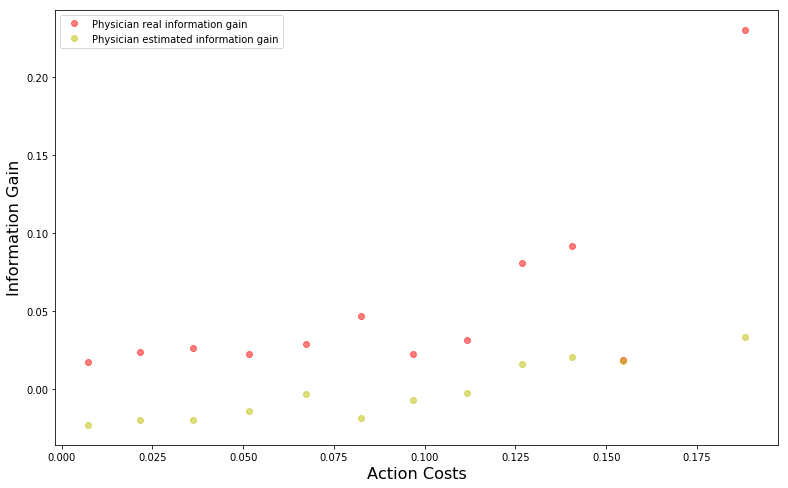

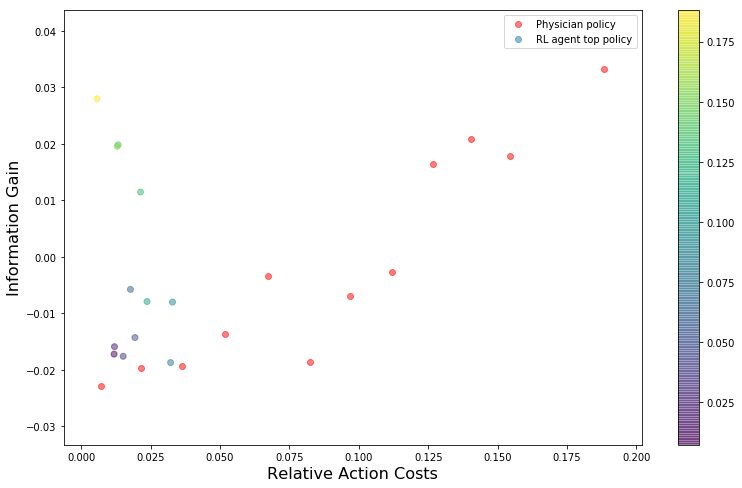

In [211]:
# plot gain vs test in phy policy
plt.figure(figsize=(8 * 1.618, 8))

eb = plt.errorbar(
    binned_action_cost_mean / ac_nor_factor,
    np.array(binned_real_info_gain_mean),
    color='r',
    label='Physician real information gain',
    fmt='o',
    alpha=0.5)

eb = plt.errorbar(
    binned_action_cost_mean / ac_nor_factor,
    np.array(binned_est_info_gain_mean),
    color='y',
    label='Physician estimated information gain',
    fmt='o',
    alpha=0.5)

plt.xlabel('Action Costs', fontsize=16.18)
plt.ylabel('Information Gain', fontsize=16.18),
plt.legend(loc='best')
#plt.xlim(right=150)
plt.show()

plt.figure(figsize=(8 * 1.618, 8))
eb = plt.scatter(
    binned_action_cost_mean / ac_nor_factor,
    np.array(binned_est_info_gain_mean),
    color='r',
    label='Physician policy',
    alpha=0.5)

eb = plt.scatter(
    binned_agent_action_cost_mean / ac_nor_factor,
    binned_agent_info_gain_mean,
    c=np.array(binned_action_cost_mean) / ac_nor_factor,
    label='RL agent top policy',
    alpha=0.5)
plt.colorbar(eb)
plt.xlabel('Relative Action Costs', fontsize=16.18)
plt.ylabel('Information Gain', fontsize=16.18),
plt.legend(loc='best')
#plt.xlim(right=150)
plt.show()

### Analyze alive/dead physician info gain 

In [29]:
# check out an example of selected policy
example_policy_dir = selected_df.policy_dir[10]
example_val_summary = pd.read_csv(
    os.path.join(example_policy_dir, val_summary_fname))
example_test_summary = pd.read_csv(
    os.path.join(example_policy_dir, test_summary_fname))
example_val_summary.head()

,patient_inds,mortality,agent_action_costs,agent_info_gains,phy_action_costs,phy_info_gains,phy_real_info_gains,rand_action_costs,rand_info_gains
0,5,0,69.179393,0.040138,12.068781,-0.023576,0.014279,50.944883,-0.038622
1,8,0,69.179393,0.046034,0.000000,-0.038125,0.030570,50.299711,-0.041780
2,17,1,104.226106,-0.015203,18.001879,0.017704,0.166053,44.758261,0.017385
3,21,0,78.391662,0.076931,0.000000,-0.005000,0.000221,45.540684,-0.000779
4,22,0,69.179393,0.047558,33.079283,0.020450,-0.018896,39.127221,-0.007573


In [212]:
# Get alive/dead patient in example policy
alive_example_test_summary = example_test_summary[example_test_summary.
                                                  mortality == 0]
dead_example_test_summary = example_test_summary[example_test_summary.mortality
                                                 == 1]

#### Raw

In [31]:
alive_example_test_summary.columns

Index(['patient_inds', 'mortality', 'agent_action_costs', 'agent_info_gains',
       'phy_action_costs', 'phy_info_gains', 'phy_real_info_gains',
       'rand_action_costs', 'rand_info_gains'],
      dtype='object')

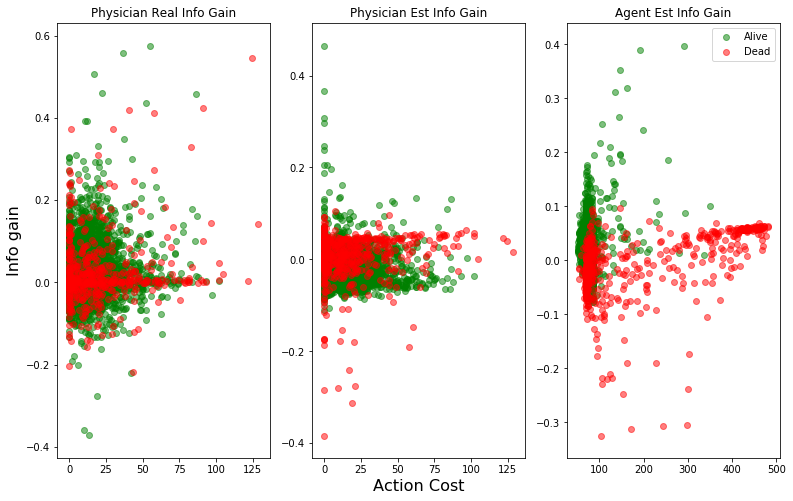

In [32]:
# plot gain vs test in phy policy
fig = plt.figure(figsize=(8 * 1.618, 8))

plt.subplot('131')
plt.scatter(
    alive_example_test_summary.phy_action_costs,
    alive_example_test_summary.phy_real_info_gains,
    label='Alive',
    color='g',
    alpha=0.5)
plt.scatter(
    dead_example_test_summary.phy_action_costs,
    dead_example_test_summary.phy_real_info_gains,
    label='Dead',
    color='r',
    alpha=0.5)
plt.title('Physician Real Info Gain')
plt.ylabel('Info gain', fontsize=16.18)

plt.subplot('132')
plt.scatter(
    alive_example_test_summary.phy_action_costs,
    alive_example_test_summary.phy_info_gains,
    label='Alive',
    color='g',
    alpha=0.5)
plt.scatter(
    dead_example_test_summary.phy_action_costs,
    dead_example_test_summary.phy_info_gains,
    label='Dead',
    color='r',
    alpha=0.5)
plt.title('Physician Est Info Gain')
plt.xlabel('Action Cost', fontsize=16.18)
plt.subplot('133')
plt.scatter(
    alive_example_test_summary.agent_action_costs,
    alive_example_test_summary.agent_info_gains,
    label='Alive',
    color='g',
    alpha=0.5)
plt.scatter(
    dead_example_test_summary.agent_action_costs,
    dead_example_test_summary.agent_info_gains,
    label='Dead',
    color='r',
    alpha=0.5)
plt.title('Agent Est Info Gain')
plt.legend(loc='best')
plt.show()

#### Binned

In [260]:
def get_binned_action_cost_and_info_gain_by_interval_with_mortality(
        df, ac_name, ig_name, interval, mortality):
    binned_info_gain_mean, binned_info_gain_std, binned_action_cost_mean, binned_action_cost_std = [], [], [], []
    df_by_mortality = df[(df.mortality == mortality)]
    for i in np.arange(0, 200, interval):
        tmp = df_by_mortality[(df_by_mortality[ac_name] < i + interval)
                              & (df_by_mortality[ac_name] > i)]
        binned_info_gain_mean.append(tmp[ig_name].mean())
        binned_info_gain_std.append(tmp[ig_name].std())
        binned_action_cost_mean.append(tmp[ac_name].mean())
        binned_action_cost_std.append(tmp[ac_name].std())

    return binned_info_gain_mean, binned_info_gain_std, binned_action_cost_mean, binned_action_cost_std


def get_action_cost_and_info_gain_by_df_with_mortality(df, ac_name, ig_name,
                                                       mortality):
    binned_info_gain_mean, binned_info_gain_std, binned_action_cost_mean, binned_action_cost_std = [], [], [], []

    for i in range(len(df)):
        tmp = pd.read_csv(os.path.join(df.policy_dir[i], test_summary_fname))
        tmp = tmp[tmp.mortality == mortality]
        binned_info_gain_mean.append(tmp[ig_name].mean())
        binned_info_gain_std.append(tmp[ig_name].std())
        binned_action_cost_mean.append(tmp[ac_name].mean())
        binned_action_cost_std.append(tmp[ac_name].std())
    return binned_info_gain_mean, binned_info_gain_std, binned_action_cost_mean, binned_action_cost_std

In [291]:
# top policy performance in dead patient
ig_mean, ig_std, ac_mean, ac_std = get_action_cost_and_info_gain_by_df_with_mortality(
    df=top_df,
    ac_name='agent_action_costs',
    ig_name='agent_info_gains',
    mortality=1)
ig_mean, ac_mean / ac_nor_factor

([0.006375278292493097,
  0.0063734280828871386,
  -0.016031666818550314,
  -0.02052656501975737,
  -0.0032822721037670676,
  0.006375278292493097,
  0.006122317603024052,
  -0.013992860226032222,
  0.006375278292493097,
  0.006098513367141382,
  -0.007881730479884145,
  0.006375278292493097,
  -0.0145983176426997,
  0.006375278292493097,
  0.006375278292493097,
  0.006466621050643028,
  -0.00179357288471985,
  0.0019686448671988608,
  0.006375278292493097,
  -0.022665603284940813,
  0.006375278292493097,
  0.0026308805077149273,
  -0.0012926632935708162,
  0.006375278292493097,
  0.008314611356430362,
  0.004686413996609519,
  -0.015908754255951965,
  -0.025158880127232417,
  0.006375278292493097,
  -0.011277847014598275,
  0.006375278292493097,
  -0.016176982551054753],
 array([0.00000000e+00, 1.11981495e-05, 1.05308824e-01, 1.47999577e-01,
        1.12685530e-01, 0.00000000e+00, 3.85527205e-02, 2.85496607e-01,
        0.00000000e+00, 2.37265323e-03, 3.02471847e-01, 0.00000000e+00,
 

In [292]:
# physician policy performance in dead patient
dead_example_test_summary.phy_info_gains.mean(
), dead_example_test_summary.phy_action_costs.mean() / ac_nor_factor

(0.005086550077726954, 0.029567065588550104)

In [293]:
# top policy performance in alive patient
ig_mean, ig_std, ac_mean, ac_std = get_action_cost_and_info_gain_by_df_with_mortality(
    df=top_df,
    ac_name='agent_action_costs',
    ig_name='agent_info_gains',
    mortality=0)
ig_mean, ac_mean / ac_nor_factor

([-0.026158145002555,
  -0.025971535083223078,
  0.02835997639794558,
  0.03005619620512154,
  0.016716180419448078,
  -0.026158145002555,
  -0.02522779036109838,
  0.02880235672127814,
  -0.026158145002555,
  -0.01832020001027908,
  0.029052077376912913,
  -0.026158145002555,
  0.02750469233657335,
  -0.026158145002555,
  -0.026158145002555,
  0.0003245303936506327,
  0.008126888322437758,
  -0.01175411283461813,
  -0.026158145002555,
  0.04140614789183466,
  -0.026158145002555,
  -0.013473757730265164,
  0.012242534217845802,
  -0.026158145002555,
  0.020537878280192656,
  -0.02544058523782855,
  0.0640243704104415,
  0.057416036499733925,
  -0.026158033743979514,
  0.006128873365583496,
  -0.026158145002555,
  0.030870024559193365],
 array([0.00000000e+00, 8.52739336e-04, 1.02294993e-01, 1.20205778e-01,
        8.17011427e-02, 0.00000000e+00, 8.17803777e-03, 1.06738711e-01,
        0.00000000e+00, 1.47529015e-02, 1.13605500e-01, 0.00000000e+00,
        9.94687242e-02, 0.00000000e+00

In [294]:
# physician policy performance in alive patient
alive_example_test_summary.phy_info_gains.mean(
), alive_example_test_summary.phy_action_costs.mean() / ac_nor_factor

(-0.023135801835677827, 0.015716428766759827)

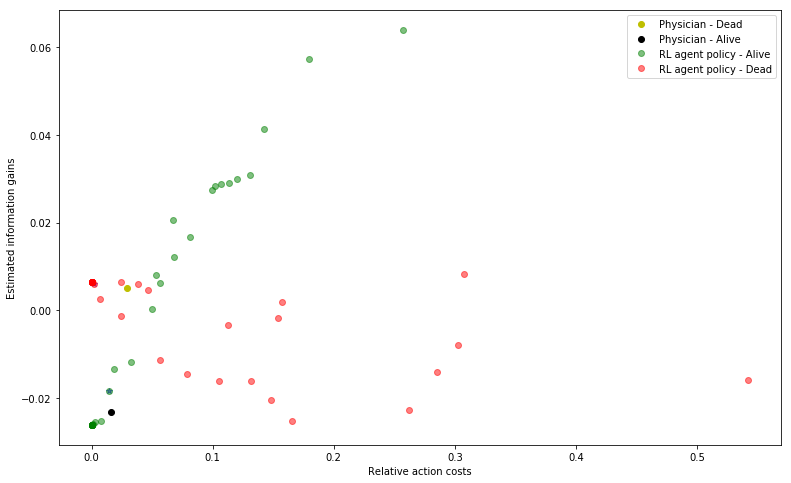

In [265]:
plt.figure(figsize=(8 * 1.618, 8))

plt.scatter(
    dead_example_test_summary.phy_action_costs.mean() / ac_nor_factor,
    dead_example_test_summary.phy_info_gains.mean(),
    color='y',
    label='Physician - Dead')
plt.scatter(
    alive_example_test_summary.phy_action_costs.mean() / ac_nor_factor,
    alive_example_test_summary.phy_info_gains.mean(),
    color='k',
    label='Physician - Alive')

ig_mean, ig_std, ac_mean, ac_std = get_action_cost_and_info_gain_by_df_with_mortality(
    df=top_df,
    ac_name='agent_action_costs',
    ig_name='agent_info_gains',
    mortality=0)

eb = plt.errorbar(
    np.array(ac_mean) / ac_nor_factor, ig_mean, color='b', fmt='*', alpha=0.5)

ig_mean, ig_std, ac_mean, ac_std = get_action_cost_and_info_gain_by_df_with_mortality(
    df=top_df,
    ac_name='agent_action_costs',
    ig_name='agent_info_gains',
    mortality=1)

eb = plt.errorbar(
    np.array(ac_mean) / ac_nor_factor, ig_mean, color='b', fmt='*', alpha=0.5)

ig_mean, ig_std, ac_mean, ac_std = get_action_cost_and_info_gain_by_df_with_mortality(
    df=selected_df,
    ac_name='agent_action_costs',
    ig_name='agent_info_gains',
    mortality=0)

eb = plt.errorbar(
    np.array(ac_mean) / ac_nor_factor,
    ig_mean,
    #yerr=np.array(ig_std),
    #xerr=np.array(ac_std)/ ac_nor_factor,
    color='g',
    label='RL agent policy - Alive',
    fmt='o',
    alpha=0.5)
#eb[-1][0].set_linestyle('--')
#eb[-1][1].set_linestyle('-.')

ig_mean, ig_std, ac_mean, ac_std = get_action_cost_and_info_gain_by_df_with_mortality(
    df=selected_df,
    ac_name='agent_action_costs',
    ig_name='agent_info_gains',
    mortality=1)

eb = plt.errorbar(
    np.array(ac_mean) / ac_nor_factor,
    ig_mean,
    #yerr=np.array(ig_std),
    #xerr=np.array(ac_std)/ ac_nor_factor,
    color='r',
    label='RL agent policy - Dead',
    fmt='o',
    alpha=0.5)
#eb[-1][0].set_linestyle('--')
#eb[-1][1].set_linestyle('-.')

# plt.scatter(
#     df_tmp['mean_agent_action_costs']/ ac_nor_factor,
#     df_tmp['mean_agent_info_gains'],
#     color='c',
#     alpha=0.5,
#     label='RL agent policies')

# plt.scatter(
#     df_tmp['mean_phy_action_costs'] / ac_nor_factor,
#     df_tmp['mean_phy_info_gains'],
#     color='m',
#     alpha=0.5,
#     label='Physician policy')
plt.legend(loc='best')
plt.xlabel('Relative action costs')
plt.ylabel('Estimated information gains')
#plt.xlim(right=0.1)
plt.show()